# Import all the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# a. Detailed code with comments

In [2]:
##import data files

In [3]:
credit_com = pd.read_excel('CreditConsumptionData.xlsx')

In [4]:
credit_com.head(1)

,ID,cc_cons
0,12554,20014.0


In [5]:
customer_beh = pd.read_excel('CustomerBehaviorData.xlsx')

In [6]:
customer_beh.head(1)

,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,17051,3412.6,2909.34,1077.36,3084.5,4615.97,6693.0,19.0,10,2,...,1,108,97916.0,45253.64,47635.0,2,18,19947.0,Y,3448.84


In [7]:
customer_demo = pd.read_excel('CustomerDemographics.xlsx')

In [8]:
customer_demo.head(1)

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,19427,current,M,63,MEDIUM,30.1,10,628.0,1,5.0


In [9]:
## merging the tables

In [10]:
credit_beh = pd.merge(left = credit_com , right = customer_beh , on = 'ID', how = 'left')

In [11]:
credit_beh.head(1)

,ID,cc_cons,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,12554,20014.0,24893.0,378.0,10288.0,29664.0,16291.4,11432.0,2.0,26,...,2,40,24563.0,30051.32,12761.0,2,65,50836.0,Y,1674.09


In [12]:
df = pd.merge(left = credit_beh , right = customer_demo , on = 'ID', how = 'left')

In [13]:
df.head(1)

,ID,cc_cons,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,...,emi_active,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,12554,20014.0,24893.0,378.0,10288.0,29664.0,16291.4,11432.0,2.0,26,...,1674.09,current,M,35,MEDIUM,15.0,1,708.0,0,17.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            20000 non-null  int64  
 1   cc_cons                       15000 non-null  float64
 2   cc_cons_apr                   20000 non-null  float64
 3   dc_cons_apr                   20000 non-null  float64
 4   cc_cons_may                   19999 non-null  float64
 5   dc_cons_may                   20000 non-null  float64
 6   cc_cons_jun                   20000 non-null  float64
 7   dc_cons_jun                   19999 non-null  float64
 8   cc_count_apr                  19999 non-null  float64
 9   cc_count_may                  20000 non-null  int64  
 10  cc_count_jun                  20000 non-null  int64  
 11  dc_count_apr                  20000 non-null  int64  
 12  dc_count_may                  20000 non-null  int64  
 13  d

In [15]:
##Identifying the null values

In [16]:
df.shape

(20000, 49)

# b. Data Exploratory analysis

In [17]:
df.isnull().sum()

ID                                 0
cc_cons                         5000
cc_cons_apr                        0
dc_cons_apr                        0
cc_cons_may                        1
dc_cons_may                        0
cc_cons_jun                        0
dc_cons_jun                        1
cc_count_apr                       1
cc_count_may                       0
cc_count_jun                       0
dc_count_apr                       0
dc_count_may                       0
dc_count_jun                       0
card_lim                           0
personal_loan_active               0
vehicle_loan_active                0
personal_loan_closed               1
vehicle_loan_closed                0
investment_1                       0
investment_2                       0
investment_3                       2
investment_4                       0
debit_amount_apr                   0
credit_amount_apr                  0
debit_count_apr                    1
credit_count_apr                   0
m

In [18]:
#For Predicting missing values

In [19]:
miss_data = df[df['cc_cons'].isnull()] 
miss_data

,ID,cc_cons,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,...,emi_active,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
15000,17591,NaN,2795.450,1290.00,6141.05,676.50,9146.10,15479.00,4.0,10,...,1170.49,current,M,37,MEDIUM,11.9,4,575.0,1,16.0
15001,13541,NaN,29405.130,1640.00,1670.00,2463.92,10947.50,956.00,3.0,10,...,16447.45,current,M,33,MEDIUM,7.8,6,394.0,0,19.0
15002,13431,NaN,5985.200,6189.00,2696.09,766.00,716.00,4133.22,7.0,30,...,2622.28,current,M,53,LOW,33.0,10,324.0,1,15.0
15003,8687,NaN,2105.930,18225.00,34763.56,167.00,4260.27,20185.00,1.0,99,...,340.79,current,M,33,MEDIUM,7.8,5,370.0,1,7.0
15004,14727,NaN,3269.000,3532.00,3158.40,2699.77,3373.48,5120.00,2.0,10,...,2812.20,current,M,62,LOW,12.6,9,505.0,1,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,12512,NaN,4641.500,5979.58,6008.61,4410.00,41743.00,1884.00,26.0,1,...,7870.88,current,M,35,MEDIUM,13.5,1,523.0,0,7.0
19996,14224,NaN,4994.450,2805.37,23214.00,5870.00,1041.00,1008.73,37.0,56,...,3668.30,current,M,53,MEDIUM,9.9,7,723.0,1,2.0
19997,18740,NaN,3262.145,2871.00,7335.25,11774.04,4130.00,1413.00,12.0,77,...,5450.34,current,M,62,HIGH,37.8,8,863.0,1,16.0
19998,18134,NaN,12824.010,4866.00,12242.48,284.00,15132.77,37911.00,67.0,1,...,59.29,current,M,34,MEDIUM,12.6,4,882.0,0,13.0


In [20]:
 #Dropping ID column because it is moreover like a serial number.

In [21]:
df = df.iloc[:,1:]

In [22]:
##Dropping Columns which have no effect on data or extra columns

In [23]:
df = df.drop(columns = ['loan_enq', 'personal_loan_active', 'vehicle_loan_active', 'personal_loan_closed', 'vehicle_loan_closed'])

In [24]:
df.head(1)

,cc_cons,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,emi_active,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,20014.0,24893.0,378.0,10288.0,29664.0,16291.4,11432.0,2.0,26,10,...,1674.09,current,M,35,MEDIUM,15.0,1,708.0,0,17.0


In [25]:
# Identifying Duplicated values

In [26]:
df.duplicated().sum()

0

In [27]:
#There is no duplicate value so no need to handle the values.

In [28]:
##Handling the null values

In [29]:
df['cc_cons'] = df['cc_cons'].fillna(value = df['cc_cons'].mean())

In [30]:
#Dropping those column which content null values except cc_cons because these records are less than 2-3%

In [31]:
 df = df.dropna()

In [32]:
df.isnull().sum()

cc_cons                         0
cc_cons_apr                     0
dc_cons_apr                     0
cc_cons_may                     0
dc_cons_may                     0
cc_cons_jun                     0
dc_cons_jun                     0
cc_count_apr                    0
cc_count_may                    0
cc_count_jun                    0
dc_count_apr                    0
dc_count_may                    0
dc_count_jun                    0
card_lim                        0
investment_1                    0
investment_2                    0
investment_3                    0
investment_4                    0
debit_amount_apr                0
credit_amount_apr               0
debit_count_apr                 0
credit_count_apr                0
max_credit_amount_apr           0
debit_amount_may                0
credit_amount_may               0
credit_count_may                0
debit_count_may                 0
max_credit_amount_may           0
debit_amount_jun                0
credit_amount_

In [33]:
df.shape

(19990, 43)

In [34]:
df.head()

,cc_cons,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,emi_active,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,20014.0,24893.00,378.00,10288.00,29664.00,16291.40,11432.00,2.0,26,10,...,1674.09,current,M,35,MEDIUM,15.0,1,708.0,0,17.0
1,10173.0,18941.62,966.00,20672.00,287.00,4217.00,885.00,1.0,7,13,...,13043.34,current,M,35,HIGH,15.0,6,123.0,0,14.0
2,16095.0,5678.87,2724.00,1964.50,3933.11,23956.25,5168.00,43.0,32,102,...,25375.27,current,M,55,MEDIUM,24.5,1,802.0,1,3.0
3,7707.0,30489.50,1236.00,12609.88,9138.14,17521.00,13650.30,53.0,1,50,...,3544.33,current,F,29,MEDIUM,4.5,6,867.0,1,4.0
4,96408.0,7441.40,6906.04,4364.00,1939.00,2121.00,6829.18,67.0,47,82,...,12780.44,current,M,34,MEDIUM,12.6,4,802.0,1,7.0


In [35]:
##Converting categorical to numerical values

In [36]:
df.columns

Index(['cc_cons', 'cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may',
       'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may',
       'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun',
       'card_lim', 'investment_1', 'investment_2', 'investment_3',
       'investment_4', 'debit_amount_apr', 'credit_amount_apr',
       'debit_count_apr', 'credit_count_apr', 'max_credit_amount_apr',
       'debit_amount_may', 'credit_amount_may', 'credit_count_may',
       'debit_count_may', 'max_credit_amount_may', 'debit_amount_jun',
       'credit_amount_jun', 'credit_count_jun', 'debit_count_jun',
       'max_credit_amount_jun', 'emi_active', 'account_type', 'gender', 'age',
       'Income', 'Emp_Tenure_Years', 'Tenure_with_Bank', 'region_code',
       'NetBanking_Flag', 'Avg_days_between_transaction'],
      dtype='object')

In [37]:
df['account_type'].unique()

array(['current', 'saving'], dtype=object)

In [38]:
df['gender'].unique()

array(['M', 'F'], dtype=object)

In [39]:
df['Income'].unique()

array(['MEDIUM', 'HIGH', 'LOW'], dtype=object)

In [40]:
#Apply Label Encoding 

In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
label_mapping = {}
for col in ['account_type', 'Income', 'gender']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    d = dict(zip(le.classes_,sorted(df[col].unique())))
    label_mapping.update(d)

In [43]:
label_mapping

{'current': 0, 'saving': 1, 'HIGH': 0, 'LOW': 1, 'MEDIUM': 2, 'F': 0, 'M': 1}

In [44]:
df.head()

,cc_cons,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,emi_active,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,20014.0,24893.00,378.00,10288.00,29664.00,16291.40,11432.00,2.0,26,10,...,1674.09,0,1,35,2,15.0,1,708.0,0,17.0
1,10173.0,18941.62,966.00,20672.00,287.00,4217.00,885.00,1.0,7,13,...,13043.34,0,1,35,0,15.0,6,123.0,0,14.0
2,16095.0,5678.87,2724.00,1964.50,3933.11,23956.25,5168.00,43.0,32,102,...,25375.27,0,1,55,2,24.5,1,802.0,1,3.0
3,7707.0,30489.50,1236.00,12609.88,9138.14,17521.00,13650.30,53.0,1,50,...,3544.33,0,0,29,2,4.5,6,867.0,1,4.0
4,96408.0,7441.40,6906.04,4364.00,1939.00,2121.00,6829.18,67.0,47,82,...,12780.44,0,1,34,2,12.6,4,802.0,1,7.0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19990 entries, 0 to 19998
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   cc_cons                       19990 non-null  float64
 1   cc_cons_apr                   19990 non-null  float64
 2   dc_cons_apr                   19990 non-null  float64
 3   cc_cons_may                   19990 non-null  float64
 4   dc_cons_may                   19990 non-null  float64
 5   cc_cons_jun                   19990 non-null  float64
 6   dc_cons_jun                   19990 non-null  float64
 7   cc_count_apr                  19990 non-null  float64
 8   cc_count_may                  19990 non-null  int64  
 9   cc_count_jun                  19990 non-null  int64  
 10  dc_count_apr                  19990 non-null  int64  
 11  dc_count_may                  19990 non-null  int64  
 12  dc_count_jun                  19990 non-null  int64  
 13  card_l

In [46]:
## Identify the outliers

In [47]:
df.describe()

,cc_cons,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,emi_active,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
count,19990.000000,19990.000000,19990.000000,1.999000e+04,19990.000000,19990.000000,19990.000000,19990.000000,19990.000000,19990.000000,...,1.999000e+04,19990.000000,19990.000000,19990.000000,19990.000000,19990.000000,19990.000000,19990.000000,19990.000000,19990.000000
mean,55157.013668,17860.380492,8130.934437,1.618357e+04,7703.827293,12132.489116,7109.853722,41.617709,33.571686,41.431466,...,1.540388e+04,0.153777,0.864382,47.675038,1.558229,15.216838,5.495948,598.971786,0.717909,11.043772
std,84601.109650,25164.340286,14575.002612,2.651001e+04,17896.883943,18787.033532,13315.842752,97.853108,50.326452,46.633935,...,1.202809e+05,0.360744,0.342391,30.365874,0.638600,20.485389,2.870573,220.109815,0.450029,5.480379
min,0.000000,253.000000,19.350000,1.570000e+02,22.000000,65.000000,62.000000,1.000000,1.000000,1.000000,...,0.000000e+00,0.000000,0.000000,25.000000,0.000000,0.500000,1.000000,123.000000,0.000000,2.000000
25%,8921.250000,4375.597500,1624.650000,3.635910e+03,1634.260000,2999.075000,1361.100000,5.000000,8.000000,10.000000,...,1.545940e+03,0.000000,1.000000,33.000000,1.000000,5.100000,3.000000,424.000000,0.000000,6.000000
50%,17764.000000,10214.642500,3964.750000,8.635230e+03,3791.720000,6656.800000,3326.000000,10.000000,23.000000,35.000000,...,3.934660e+03,0.000000,1.000000,40.000000,2.000000,9.900000,6.000000,623.000000,1.000000,11.000000
75%,55157.729867,21194.250000,9339.020000,1.863329e+04,8263.590000,14194.000000,7458.820000,44.000000,43.000000,61.000000,...,9.376390e+03,0.000000,1.000000,53.000000,2.000000,18.000000,8.000000,799.000000,1.000000,16.000000
max,408382.000000,441031.330000,229255.000000,1.117246e+06,911223.490000,382914.100000,233384.000000,531.000000,601.000000,653.000000,...,7.447125e+06,1.000000,1.000000,223.000000,2.000000,203.000000,10.000000,974.000000,1.000000,20.000000


In [48]:
df.agg(['min','max','mean'])

,cc_cons,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,emi_active,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
min,0.000000,253.000000,19.350000,1.570000e+02,22.000000,65.000000,62.000000,1.000000,1.000000,1.000000,...,0.000000e+00,0.000000,0.000000,25.000000,0.000000,0.500000,1.000000,123.000000,0.000000,2.000000
max,408382.000000,441031.330000,229255.000000,1.117246e+06,911223.490000,382914.100000,233384.000000,531.000000,601.000000,653.000000,...,7.447125e+06,1.000000,1.000000,223.000000,2.000000,203.000000,10.000000,974.000000,1.000000,20.000000
mean,55157.013668,17860.380492,8130.934437,1.618357e+04,7703.827293,12132.489116,7109.853722,41.617709,33.571686,41.431466,...,1.540388e+04,0.153777,0.864382,47.675038,1.558229,15.216838,5.495948,598.971786,0.717909,11.043772


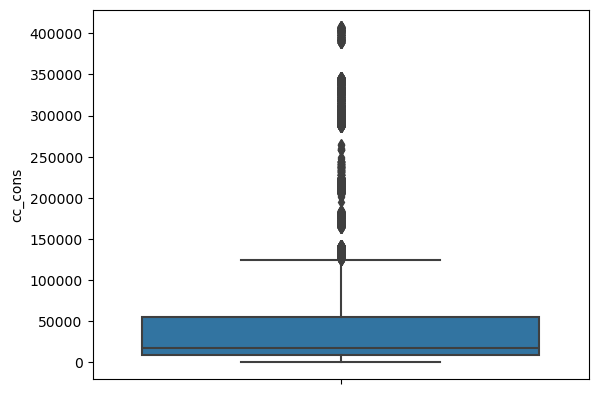

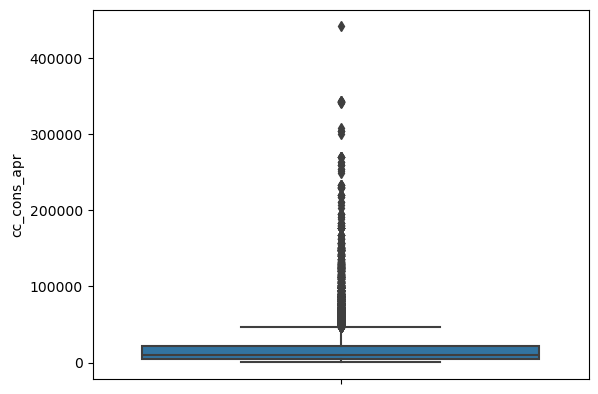

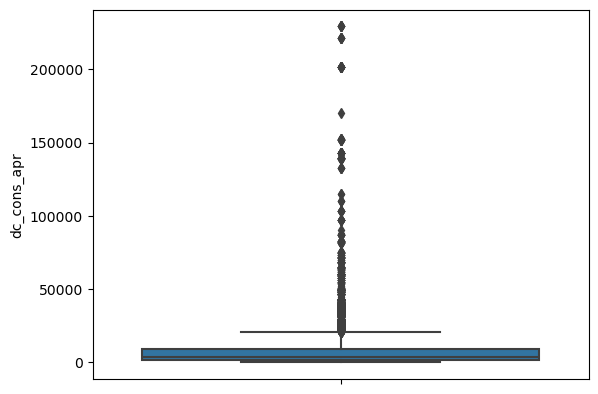

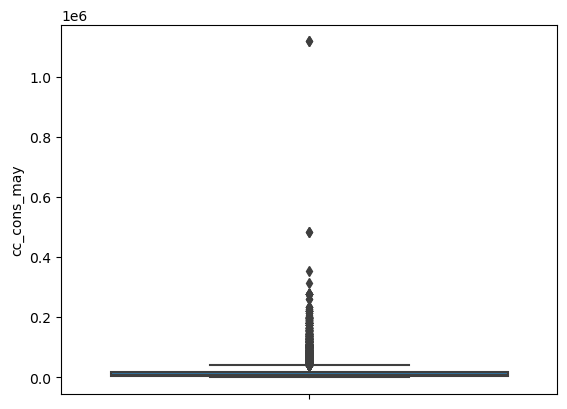

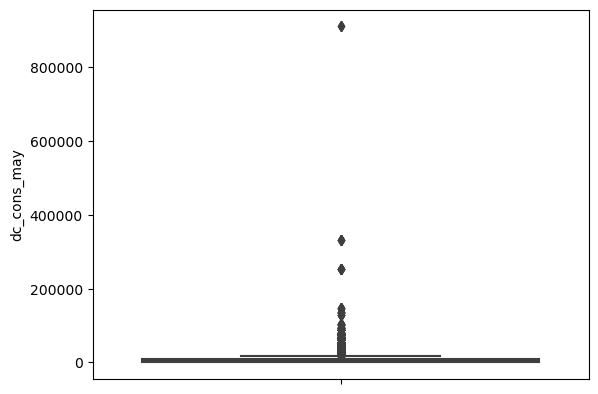

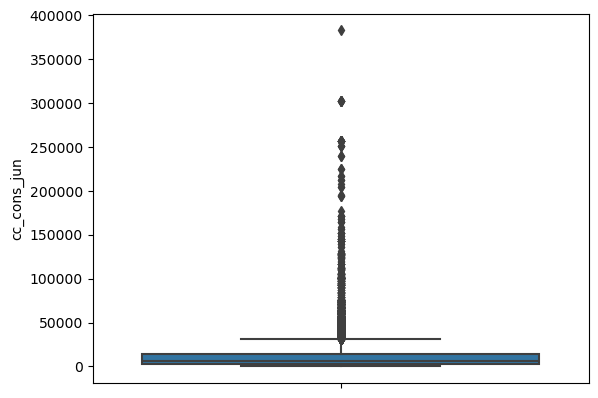

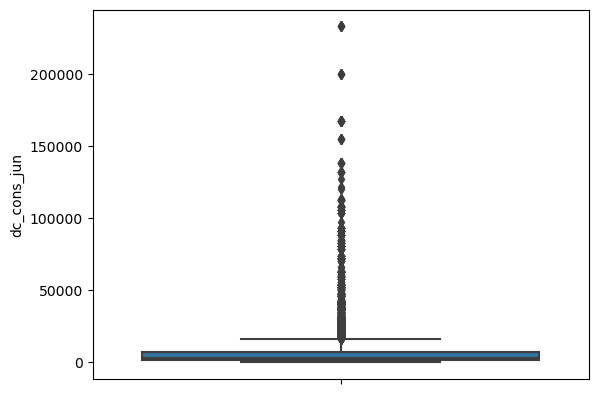

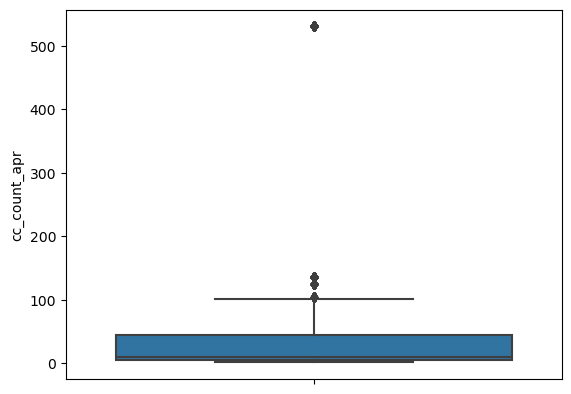

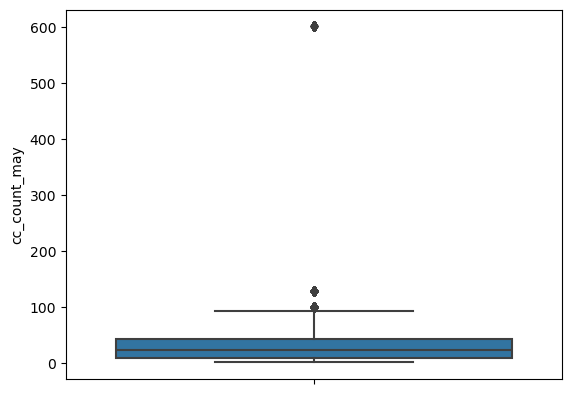

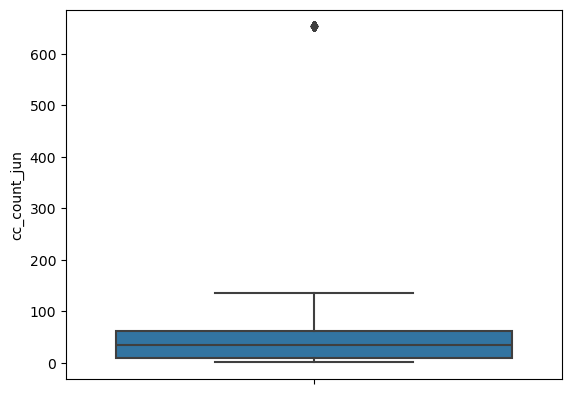

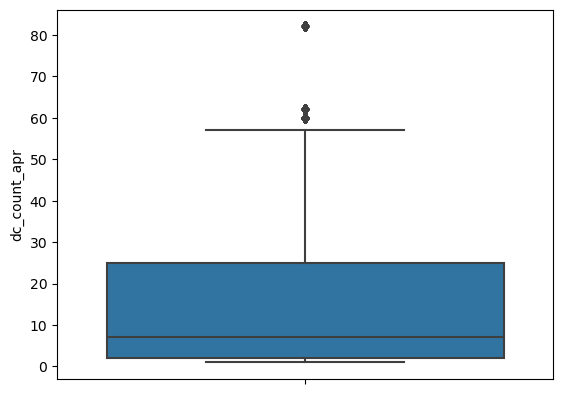

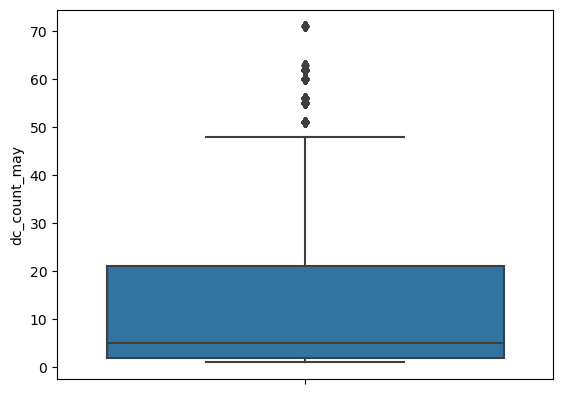

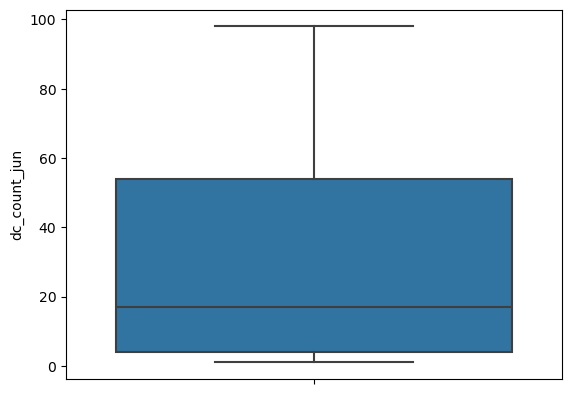

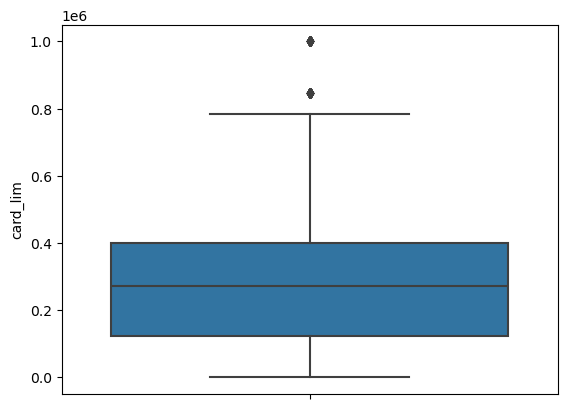

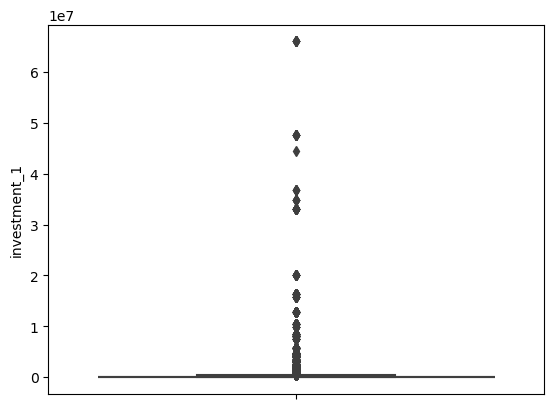

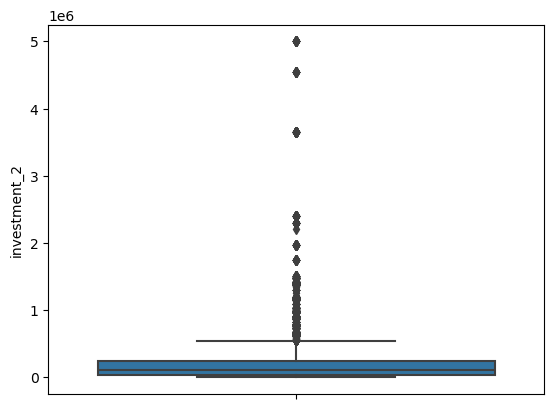

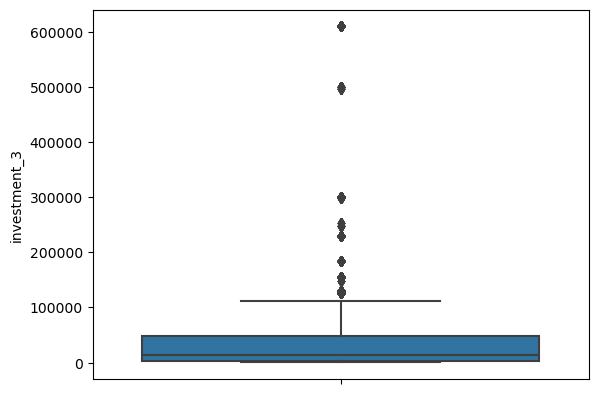

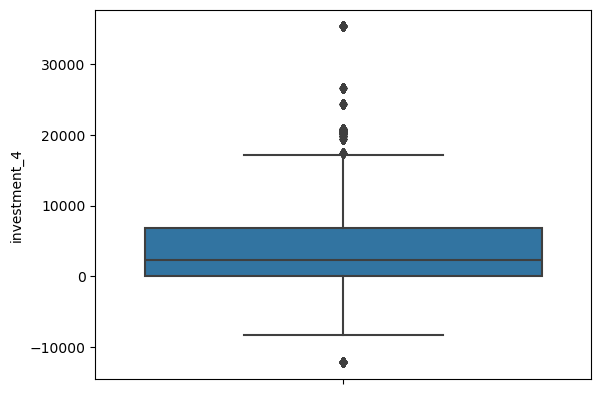

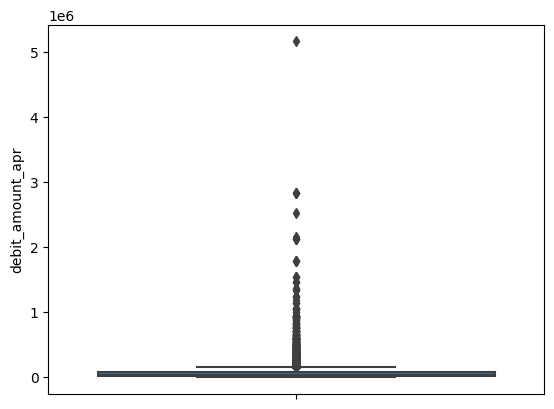

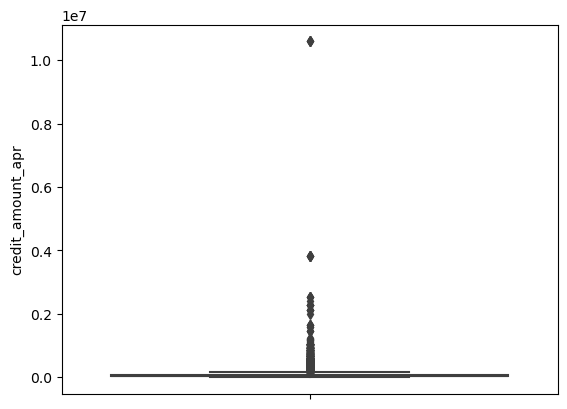

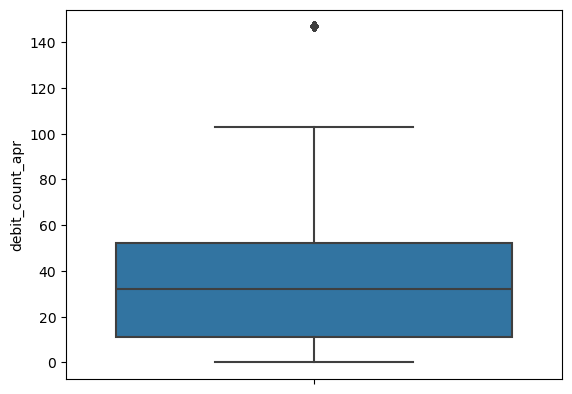

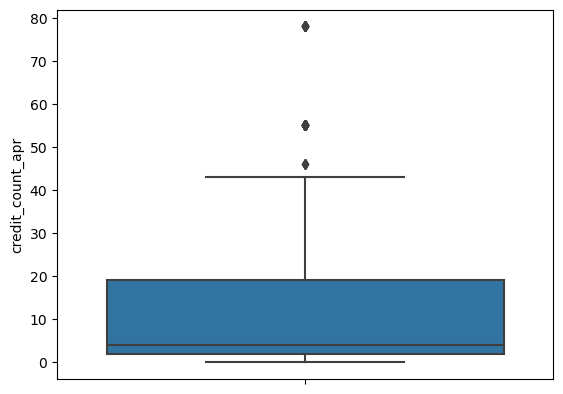

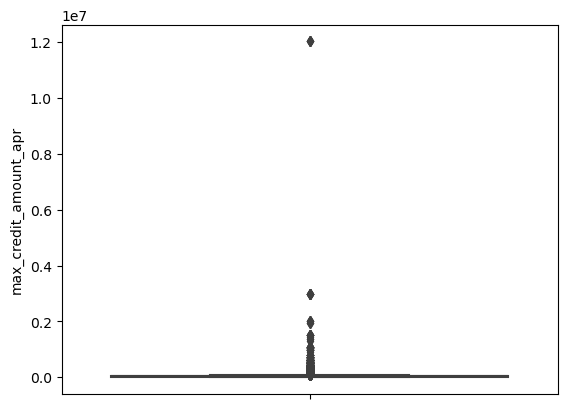

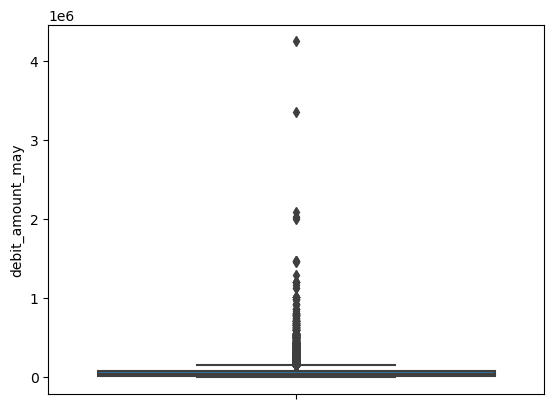

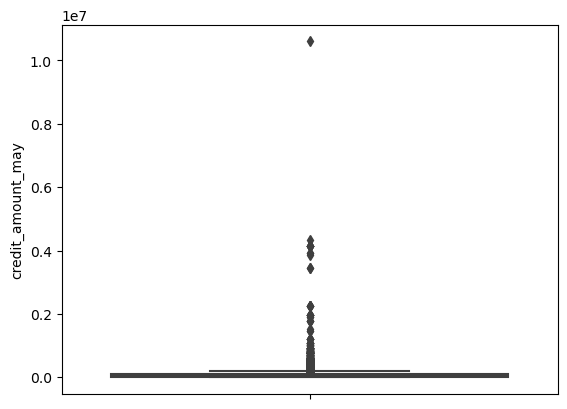

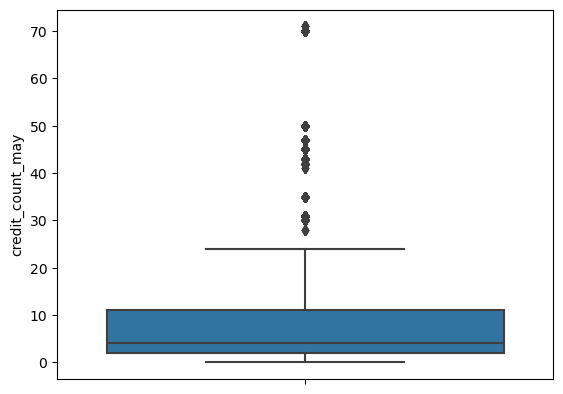

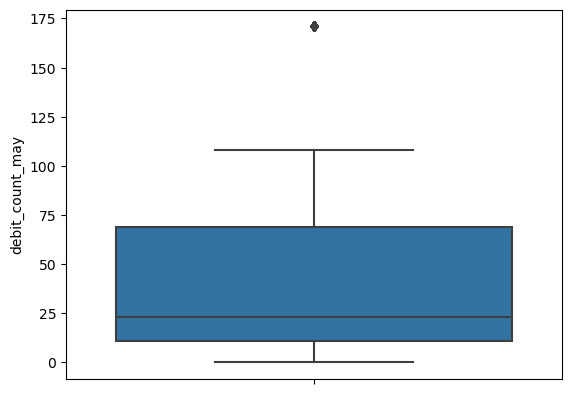

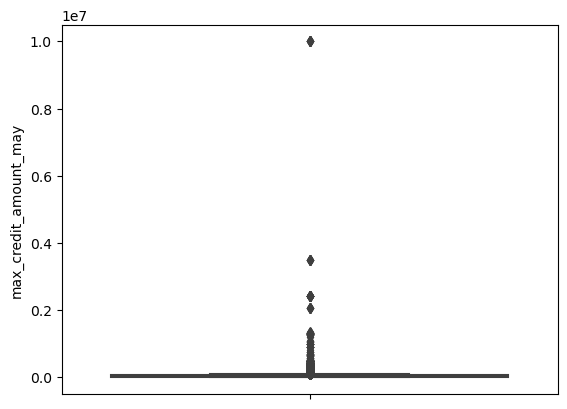

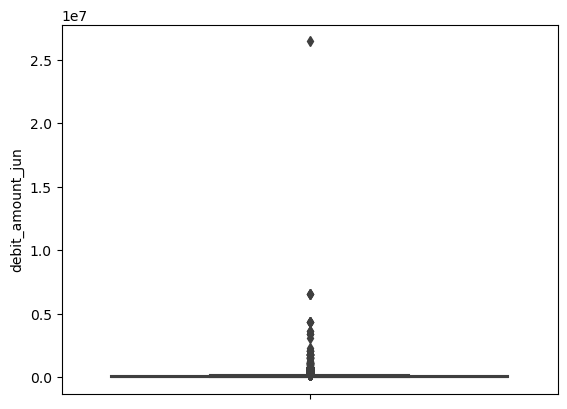

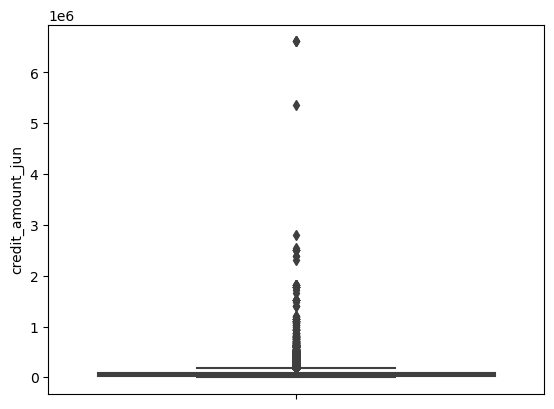

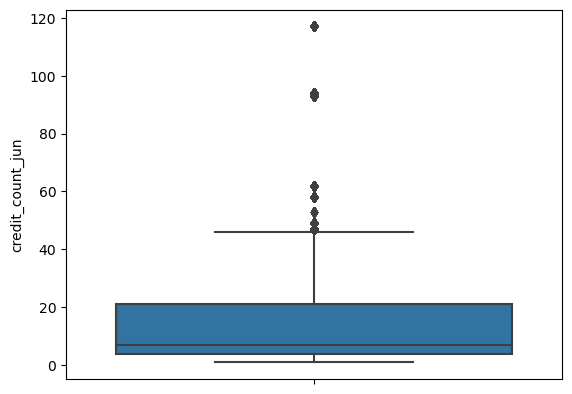

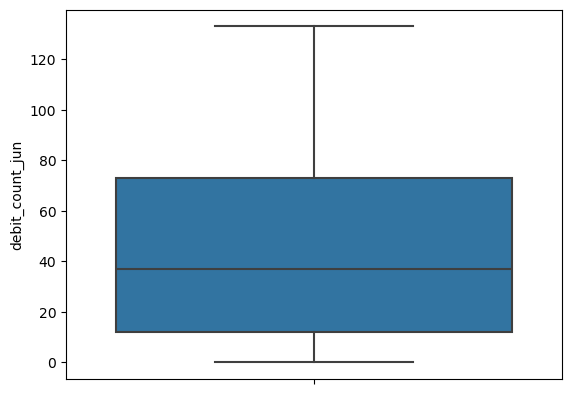

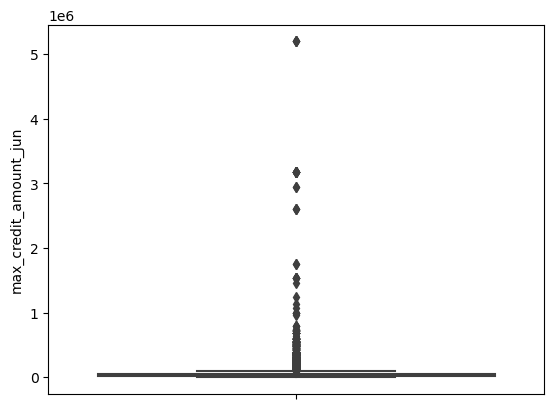

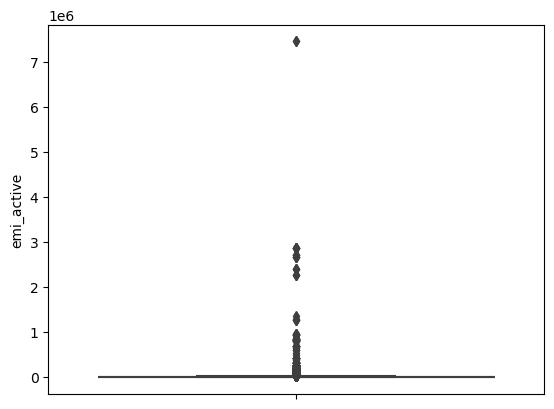

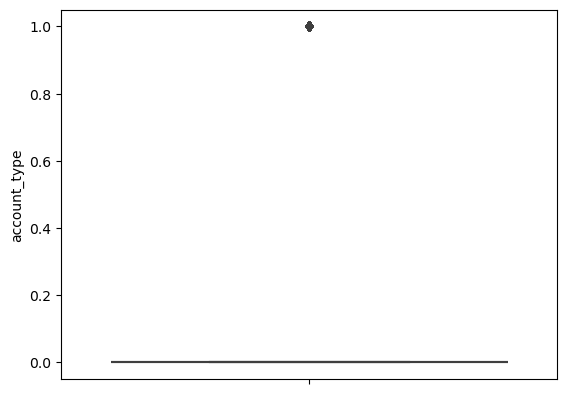

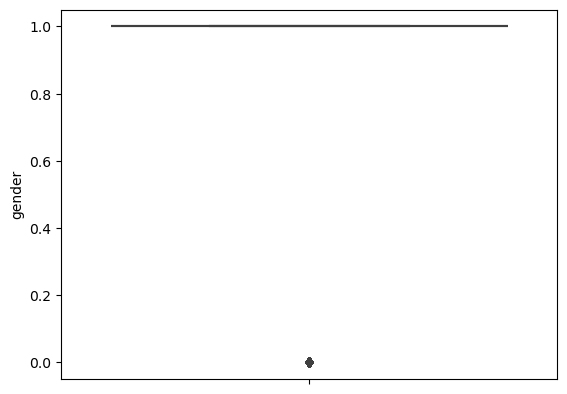

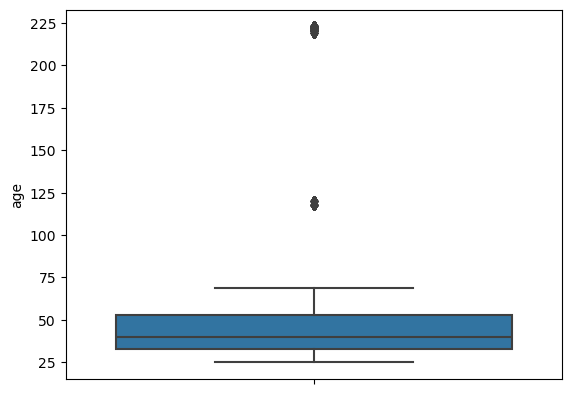

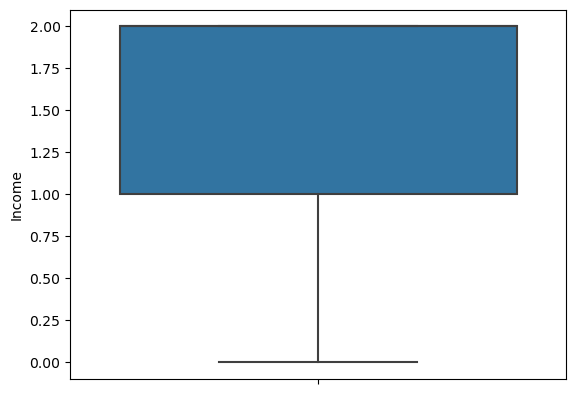

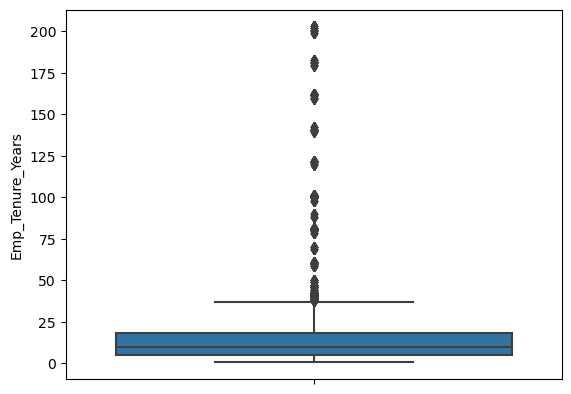

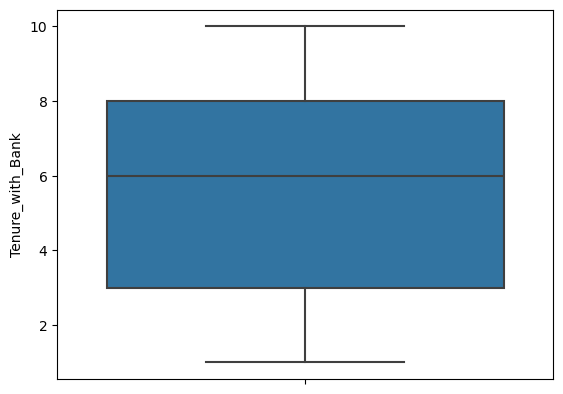

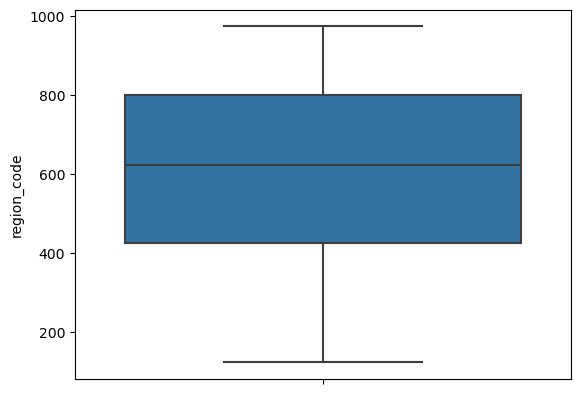

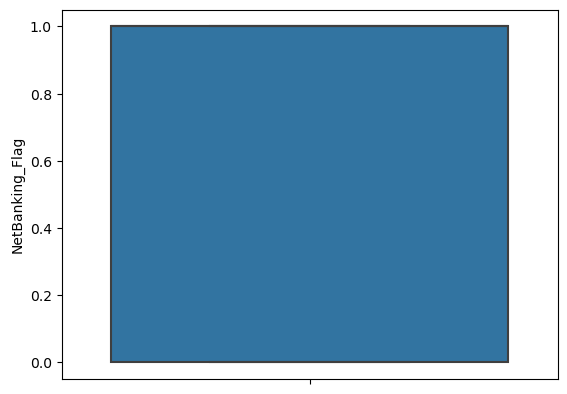

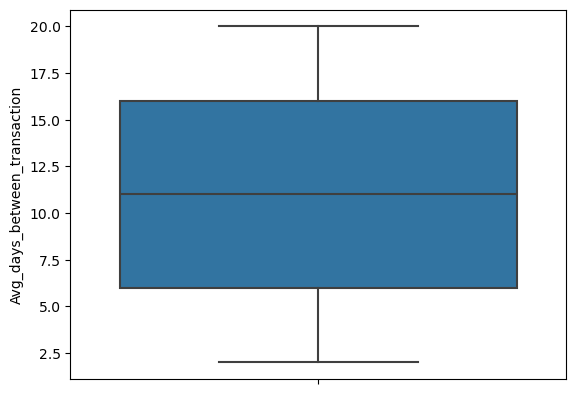

In [49]:
for col in df.select_dtypes(include = 'number').columns:
    sns.boxplot(y= df[col])
    plt.show()

In [50]:
##Handling the outliers

In [51]:
def outliers(col): 
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3- q1
    ll = q1 - 1.5* iqr
    ul = q3 + 1.5* iqr
    return(ll, ul)

In [52]:
lower_limit, upper_limit = outliers('cc_cons')
lower_limit, upper_limit

(-60433.469800000006, 124512.44966666668)

In [53]:
df[(df['cc_cons']<lower_limit)|(df['cc_cons']>upper_limit)]

,cc_cons,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,emi_active,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
5,130263.0,2328.22,1597.54,19979.75,1045.85,11686.255,628.00,6.0,7,59,...,5026.50,0,1,27,2,4.9,3,958.0,1,11.0
11,140730.0,1928.00,3562.00,3184.14,6815.50,19197.620,1338.00,1.0,66,13,...,2391.74,0,1,38,2,12.6,10,867.0,1,3.0
16,222566.0,15465.26,2854.21,291.50,3400.00,17374.765,7945.20,16.0,19,7,...,1945.12,0,1,29,2,9.0,10,860.0,1,10.0
29,141413.0,732.93,3332.48,3723.70,1624.00,8534.000,4450.50,8.0,36,6,...,38442.24,0,1,46,0,18.2,10,911.0,0,9.0
36,165997.0,8211.35,11309.79,25430.85,1810.02,11077.000,2326.00,531.0,3,2,...,4430.10,1,1,32,2,7.2,9,505.0,1,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14963,127387.0,12222.00,13112.14,2482.15,13842.14,52807.370,1256.49,2.0,26,9,...,617.24,0,1,58,2,3.8,3,963.0,1,2.0
14966,308635.0,2959.77,2612.00,17376.30,436.00,14123.300,7256.00,14.0,6,7,...,13170.34,0,1,30,1,10.0,10,966.0,1,10.0
14970,177330.0,12652.00,8345.00,3301.00,3717.00,635.000,910.00,136.0,3,35,...,10987.61,1,1,44,2,9.6,5,771.0,1,15.0
14972,335976.0,3318.50,10671.50,13863.23,135662.00,2624.370,15813.30,3.0,5,82,...,13980.90,0,1,33,1,11.7,9,656.0,0,12.0


In [54]:
df = df[(df['cc_cons']>=lower_limit)&(df['cc_cons']<=upper_limit)]

In [55]:
#Treating the outliers

In [56]:
lower_limit , upper_limit= outliers(['Emp_Tenure_Years','cc_cons_apr', 'dc_cons_apr','cc_cons_may', 'dc_cons_may', 'cc_cons_jun', 'dc_cons_jun',
                                     'investment_1', 'investment_2','investment_3', 'investment_4','debit_amount_apr', 'credit_amount_apr',
                                     'max_credit_amount_apr','debit_amount_may','credit_amount_may','credit_count_may','max_credit_amount_may',
                                     'debit_amount_jun', 'credit_amount_jun','max_credit_amount_jun','emi_active'])

print(lower_limit)
print("  ")
print(upper_limit)

Emp_Tenure_Years            -14.5500
cc_cons_apr              -20902.9375
dc_cons_apr               -9980.1500
cc_cons_may              -18483.0000
dc_cons_may               -8455.8800
cc_cons_jun              -13727.9875
dc_cons_jun               -7787.1250
investment_1            -227392.6875
investment_2            -273482.0250
investment_3             -67890.0000
investment_4             -10327.5000
debit_amount_apr         -57166.0025
credit_amount_apr        -61529.7500
max_credit_amount_apr    -27289.5000
debit_amount_may         -58939.1925
credit_amount_may        -78711.5000
credit_count_may            -11.5000
max_credit_amount_may    -34155.0000
debit_amount_jun         -63748.5000
credit_amount_jun        -66215.3000
max_credit_amount_jun    -32923.2500
emi_active               -10096.5100
dtype: float64
  
Emp_Tenure_Years             37.8500
cc_cons_apr               46405.7625
dc_cons_apr               20967.2900
cc_cons_may               40485.0000
dc_cons_may         

In [57]:
lower_bounds = {
    'Emp_Tenure_Years': -14.25000,
    'cc_cons_apr': -20852.38125,
    'dc_cons_apr': -9946.90500,
    'cc_cons_may': -18860.16000,
    'dc_cons_may': -8309.73500,
    'cc_cons_jun': -13793.31250,
    'dc_cons_jun': -7785.48000,
    'investment_1': -227479.37500,
    'investment_2': -270180.00000,
    'investment_3': -67890.00000,
    'investment_4': -10327.50000,
    'debit_amount_apr': -56807.54875,
    'credit_amount_apr': -61700.00000,
    'max_credit_amount_apr': -27231.00000,
    'debit_amount_may': -59054.81000,
    'credit_amount_may': -78600.59750,
    'credit_count_may': -11.50000,
    'max_credit_amount_may': -34124.00000,
    'debit_amount_jun': -63473.21375,
    'credit_amount_jun': -66729.80000,
    'max_credit_amount_jun': -32747.25000,
    'emi_active': -10199.73500,
}

upper_bounds = {
    'Emp_Tenure_Years': 37.350000,
    'cc_cons_apr': 46422.228750,
    'dc_cons_apr': 20910.575000,
    'cc_cons_may': 41129.360000,
    'dc_cons_may': 18207.585000,
    'cc_cons_jun': 30986.387500,
    'dc_cons_jun': 16605.400000,
    'investment_1': 395214.025000,
    'investment_2': 554108.000000,
    'investment_3': 119054.000000,
    'investment_4': 17212.500000,
    'debit_amount_apr': 156568.501250,
    'credit_amount_apr': 174204.000000,
    'max_credit_amount_apr': 100353.000000,
    'debit_amount_may': 153934.310000,
    'credit_amount_may': 198219.662500,
    'credit_count_may': 24.500000,
    'max_credit_amount_may': 110748.000000,
    'debit_amount_jun': 174490.316250,
    'credit_amount_jun': 177669.880000,
    'max_credit_amount_jun': 105142.750000,
    'emi_active': 21122.065000,
}

# Function to replace outliers based on provided bounds
def replace_outliers_with_bounds(df, column, lower_bound, upper_bound):
    if column in df.columns:
        df[column] = df[column].apply(lambda x: max(lower_bound, min(x, upper_bound)))
    else:
        print(f"Column '{column}' not found in DataFrame")

# Apply the outlier replacement to each column with defined bounds
for column in lower_bounds.keys():
    lower = lower_bounds[column]
    upper = upper_bounds[column]
    replace_outliers_with_bounds(df, column, lower, upper)

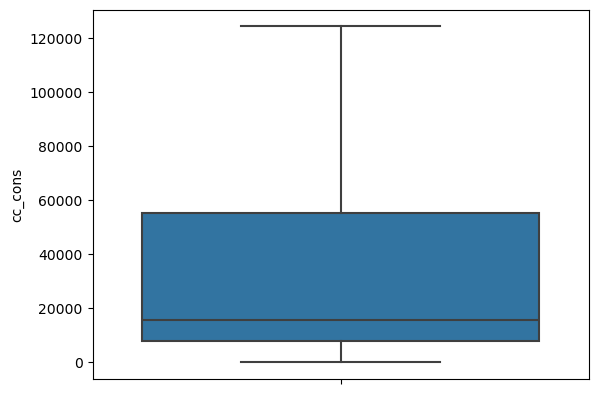

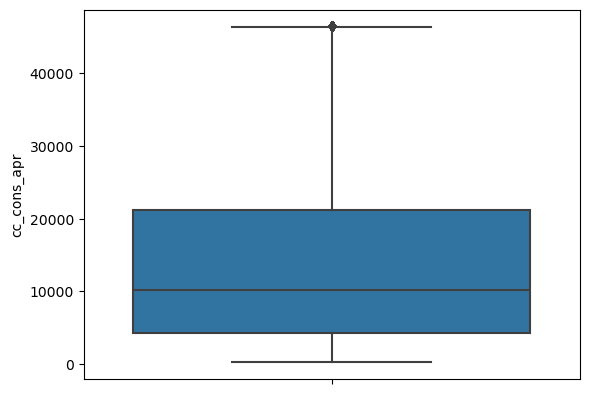

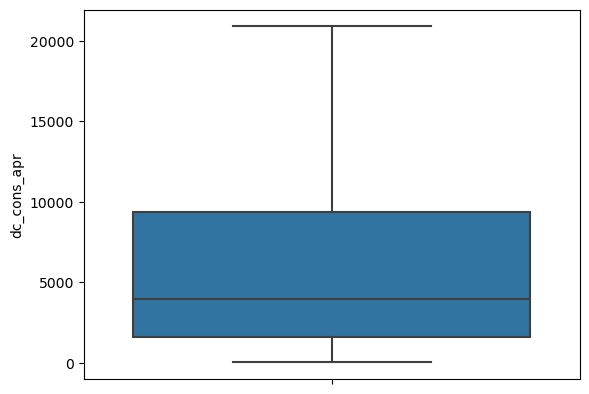

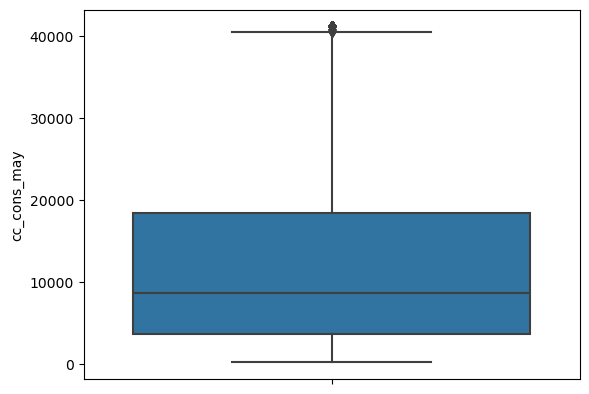

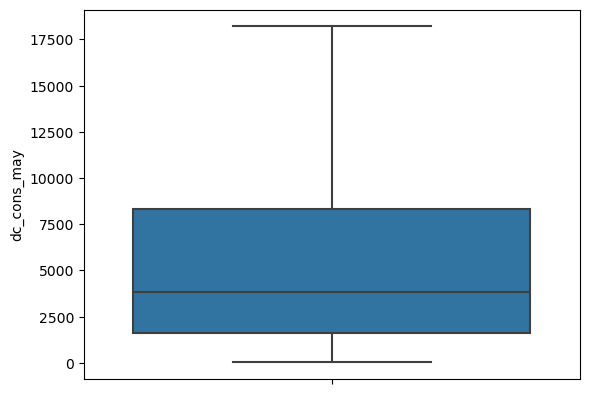

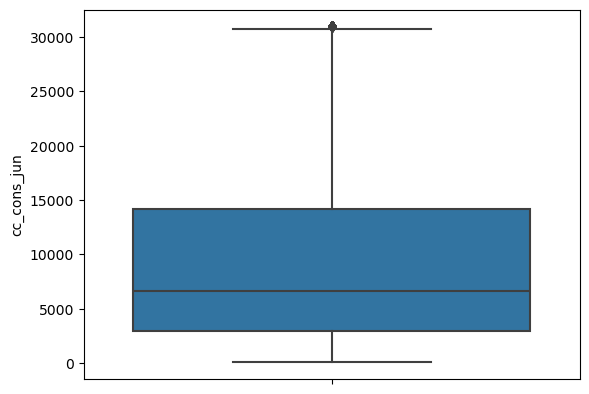

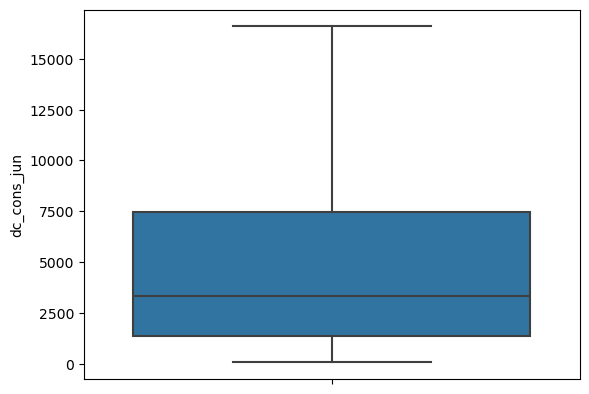

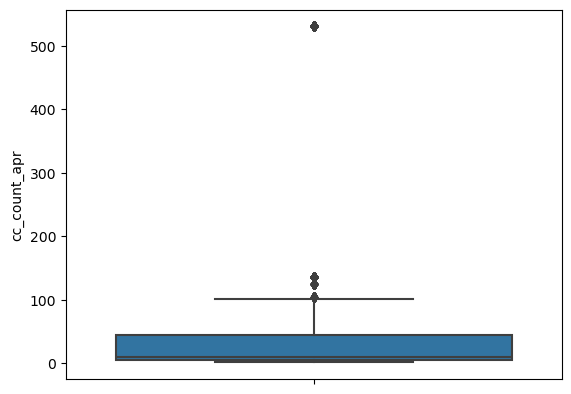

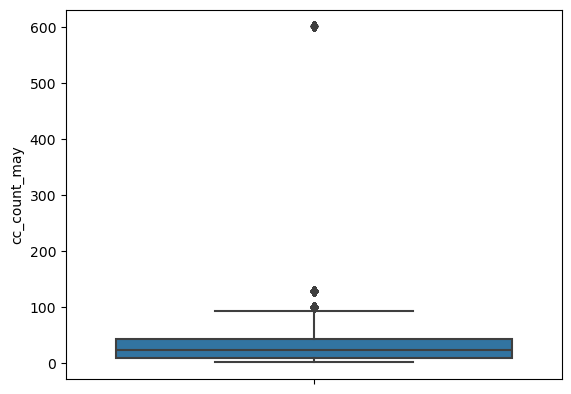

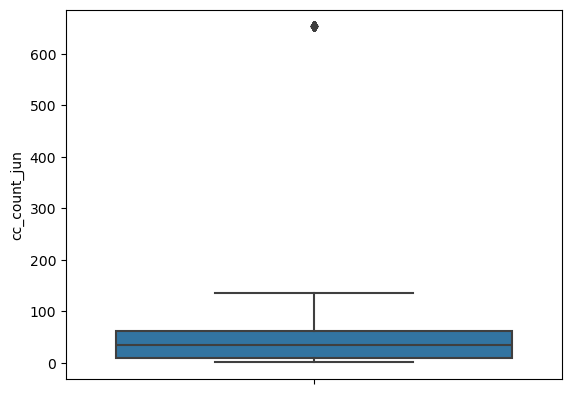

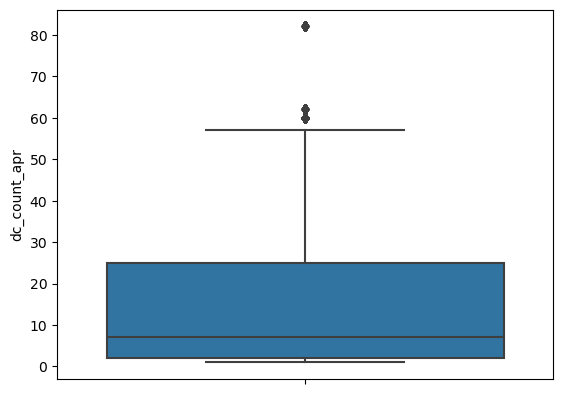

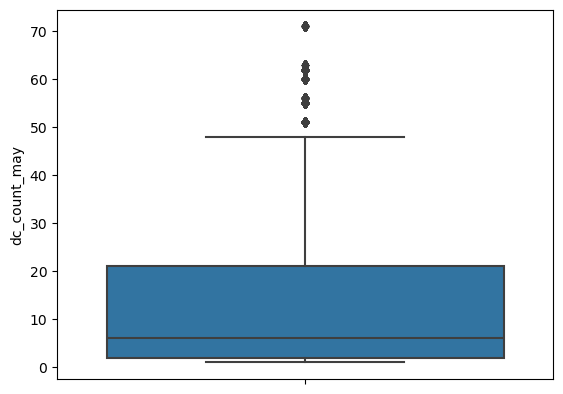

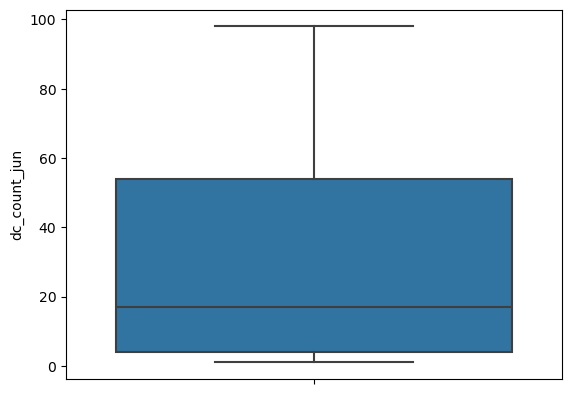

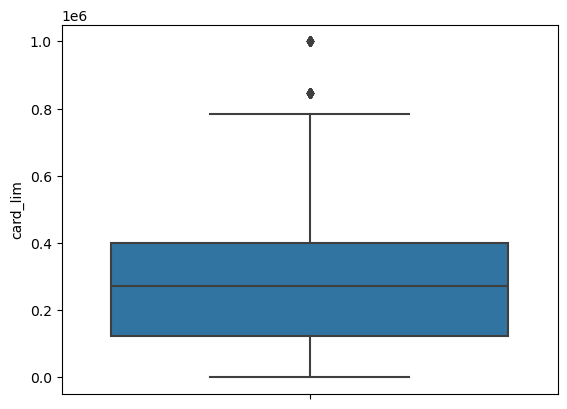

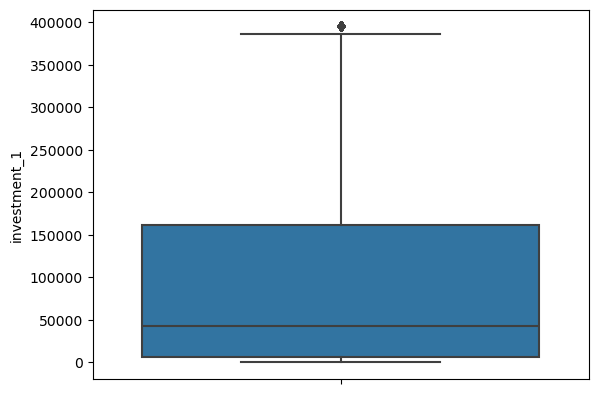

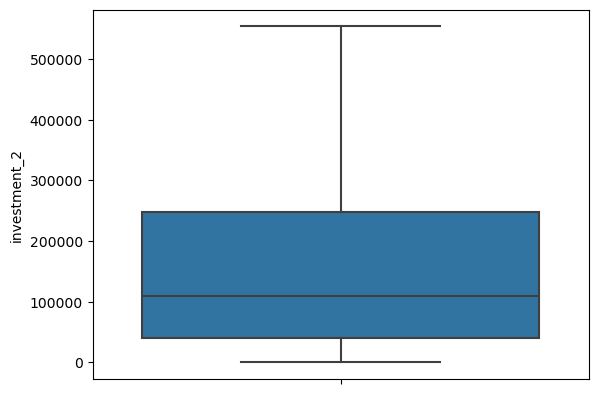

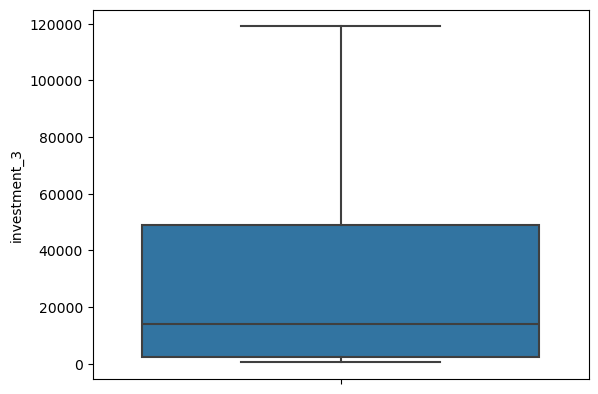

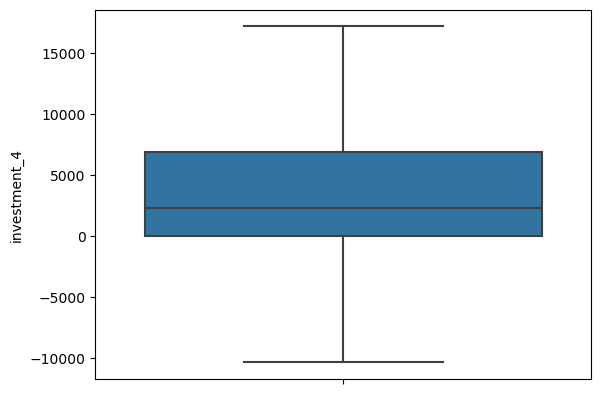

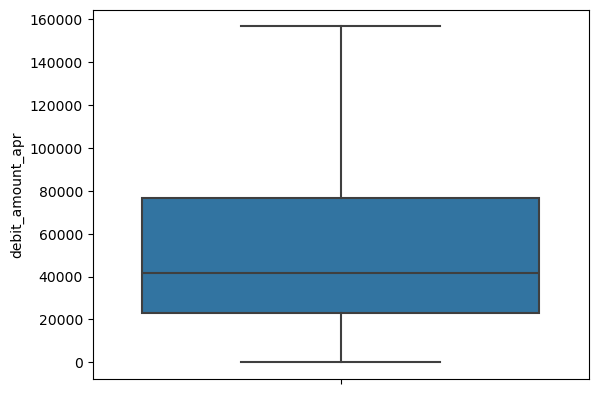

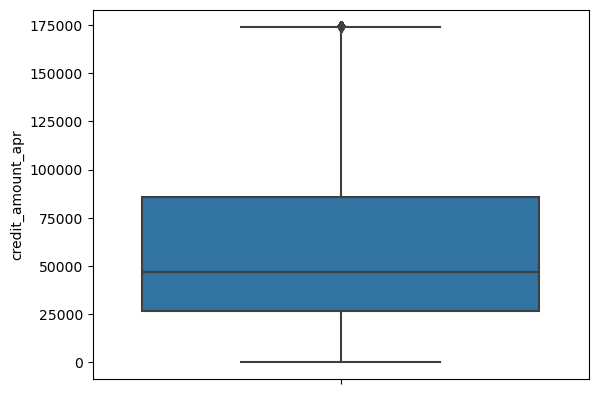

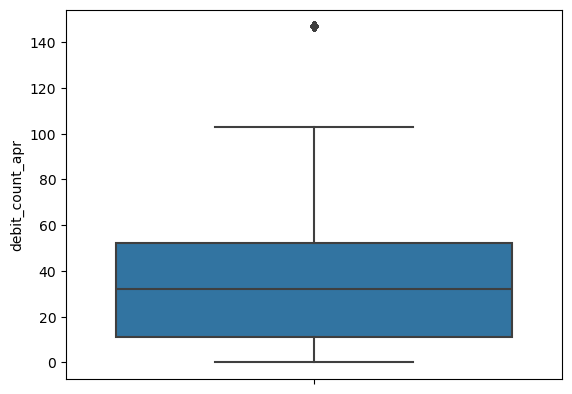

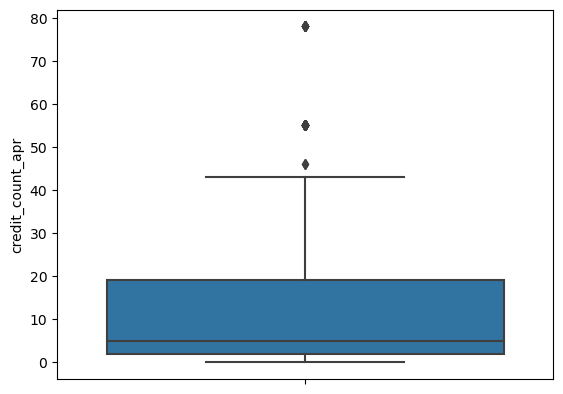

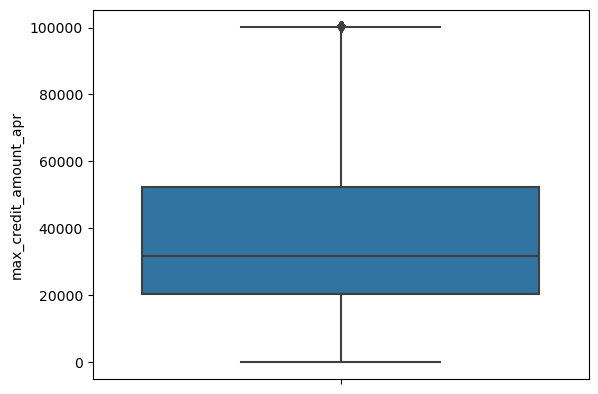

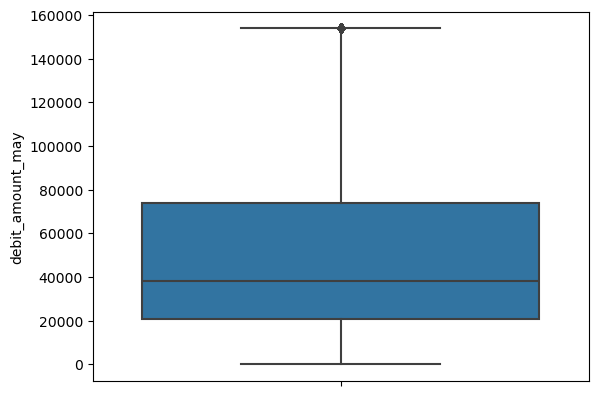

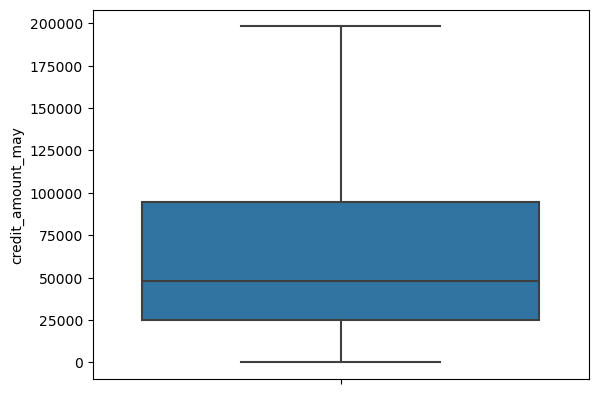

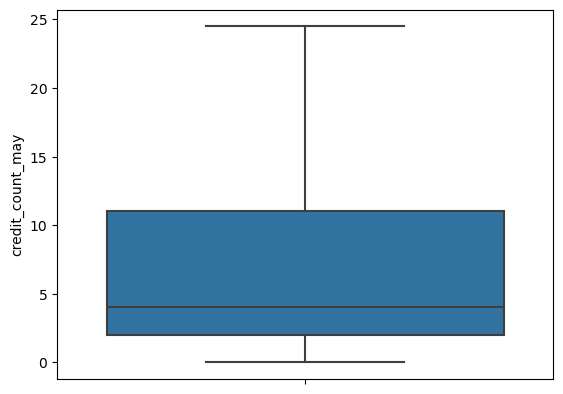

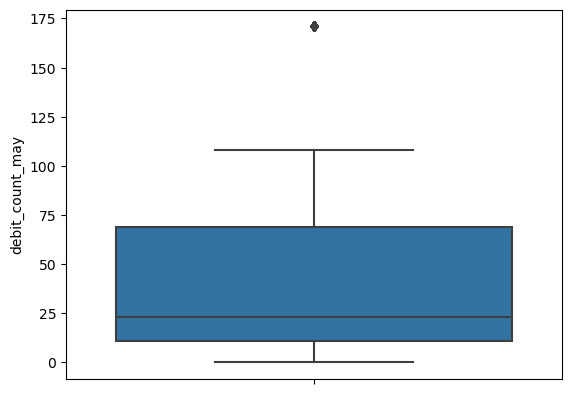

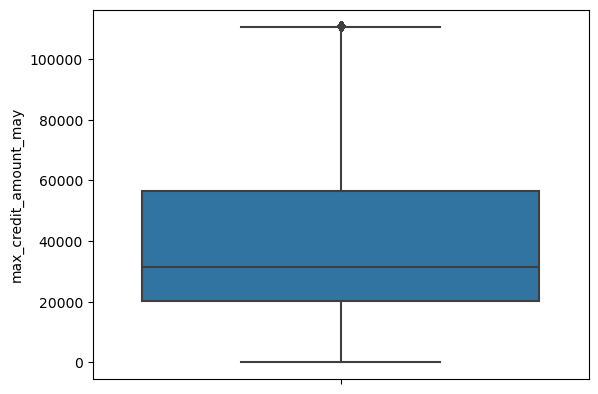

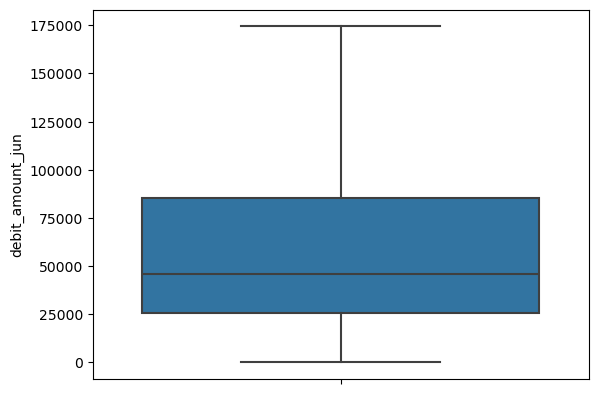

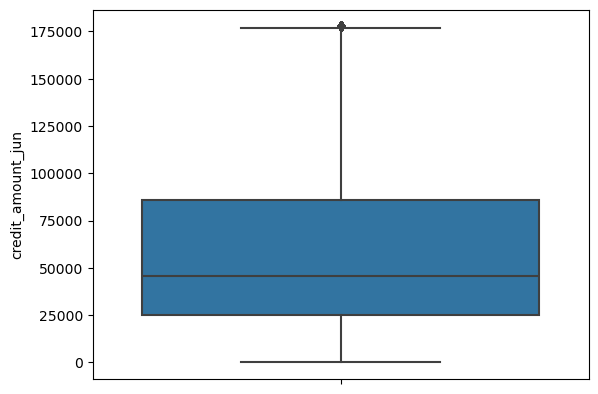

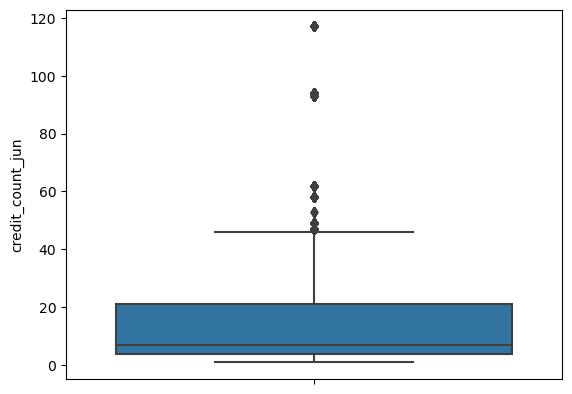

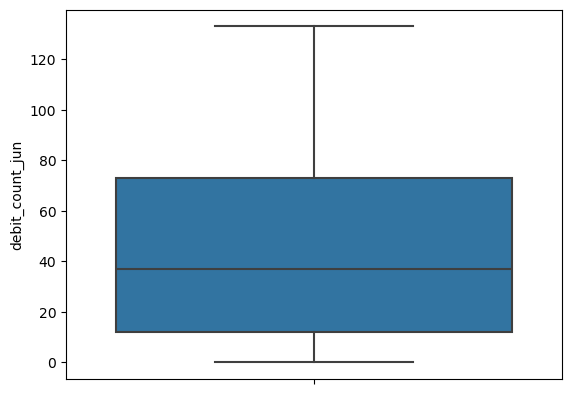

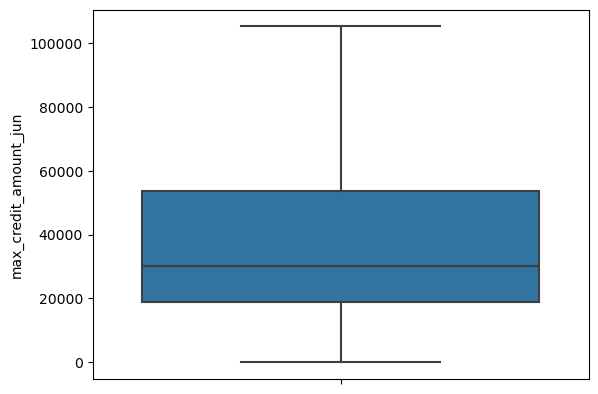

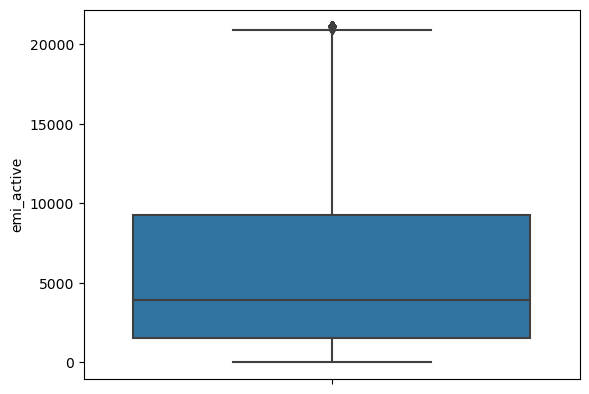

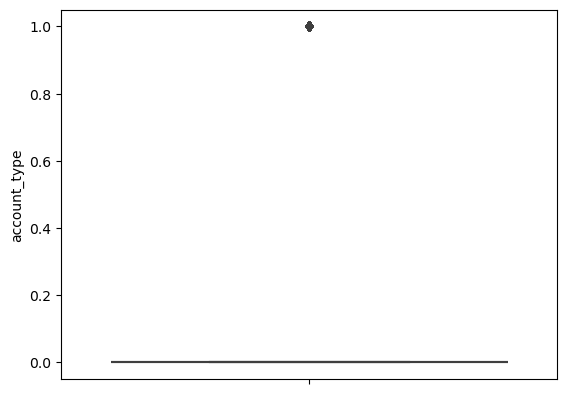

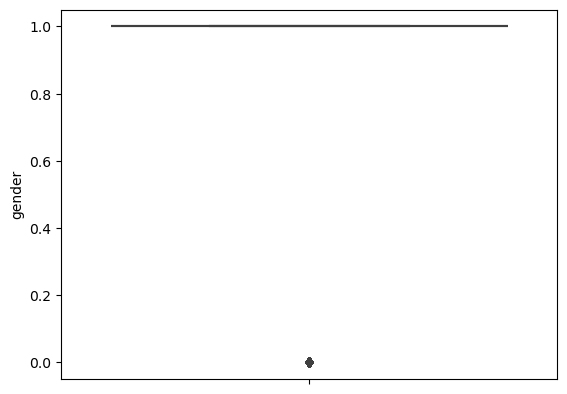

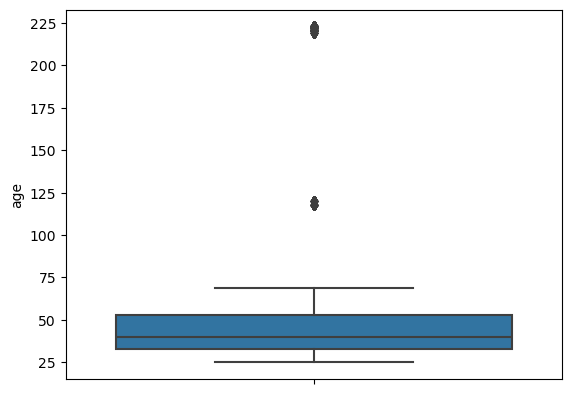

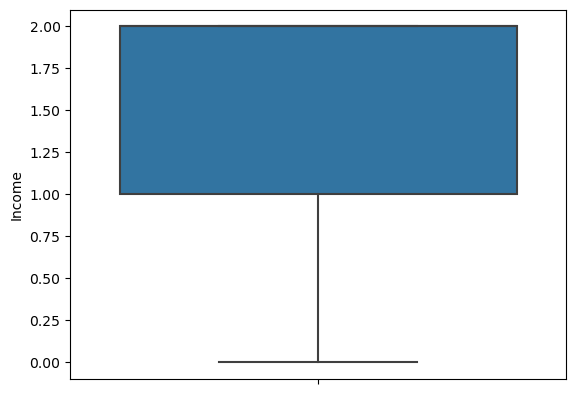

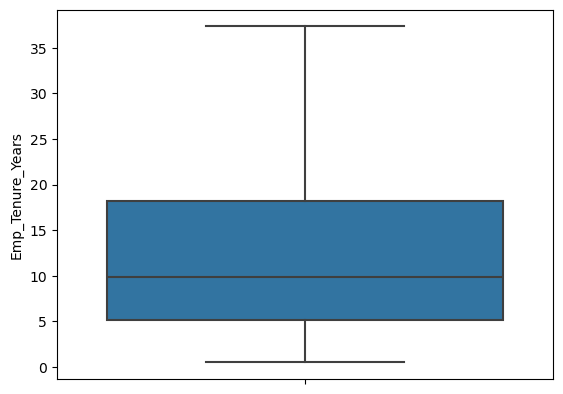

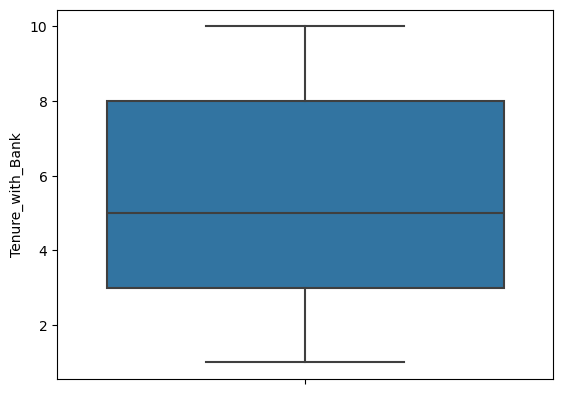

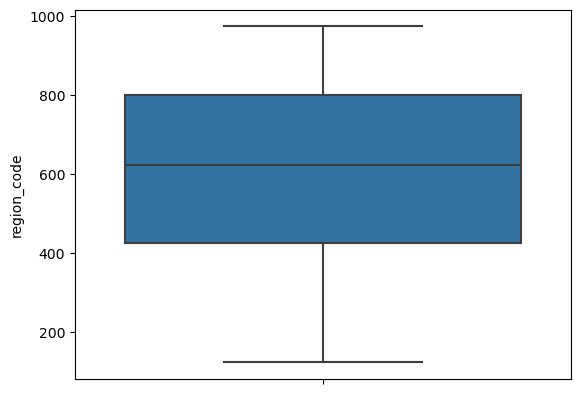

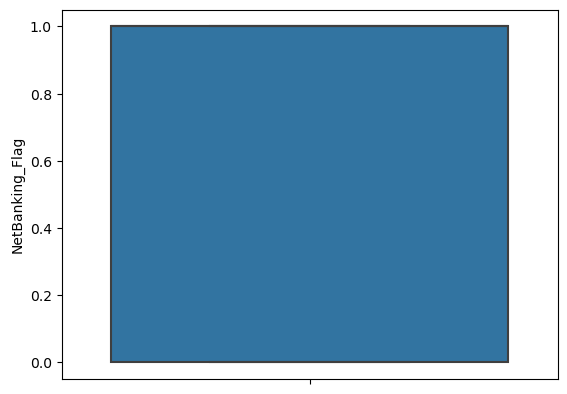

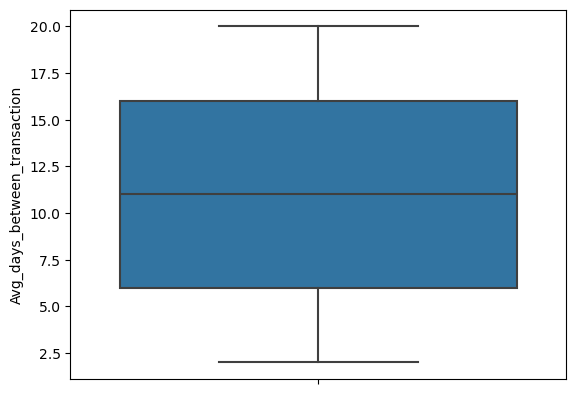

In [58]:
for col in df.select_dtypes(include = 'number').columns:
    sns.boxplot(y= df[col])
    plt.show()

In [59]:
df.head()

,cc_cons,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,emi_active,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,20014.0,24893.00,378.00,10288.00,18207.585,16291.40,11432.00,2.0,26,10,...,1674.090,0,1,35,2,15.0,1,708.0,0,17.0
1,10173.0,18941.62,966.00,20672.00,287.000,4217.00,885.00,1.0,7,13,...,13043.340,0,1,35,0,15.0,6,123.0,0,14.0
2,16095.0,5678.87,2724.00,1964.50,3933.110,23956.25,5168.00,43.0,32,102,...,21122.065,0,1,55,2,24.5,1,802.0,1,3.0
3,7707.0,30489.50,1236.00,12609.88,9138.140,17521.00,13650.30,53.0,1,50,...,3544.330,0,0,29,2,4.5,6,867.0,1,4.0
4,96408.0,7441.40,6906.04,4364.00,1939.000,2121.00,6829.18,67.0,47,82,...,12780.440,0,1,34,2,12.6,4,802.0,1,7.0


In [60]:
df.shape

(17531, 43)

In [61]:
## Feature Engineering = Removing the highly correlated columns.

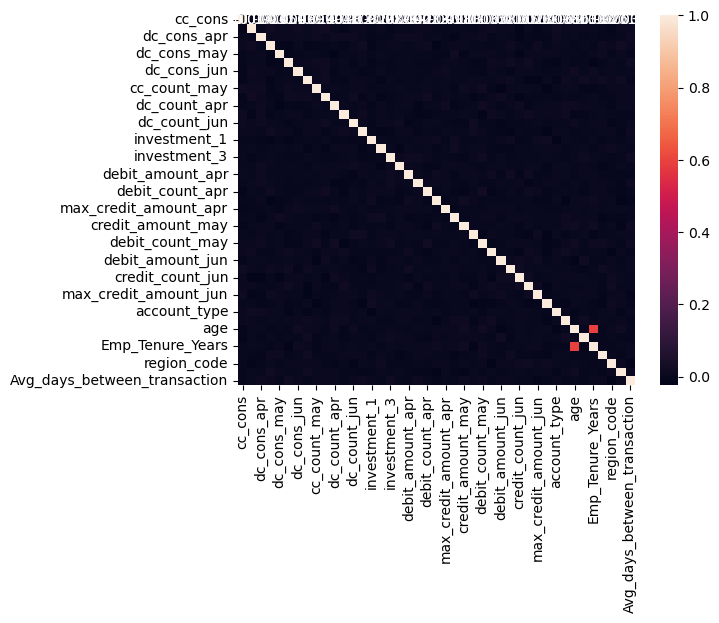

In [62]:
sns.heatmap(df.corr(), annot = True)
plt.show()

In [63]:
##Standardize the data set

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
##Select the variables

In [66]:
X = df.iloc[:,:42]
Y = df['cc_cons']

In [67]:
SS = StandardScaler()

In [68]:
df_feat = SS.fit_transform(X)

In [69]:
df_feat = pd.DataFrame(df_feat)

In [70]:
df_feat.columns = df.columns[1: ]

In [71]:
df_feat.head()

,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,...,emi_active,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,-0.270281,0.726145,-0.959040,-0.227780,2.270476,0.700010,1.218817,-0.404504,-0.148105,-0.670800,...,0.372547,-0.730117,-0.426301,0.396244,-0.417433,0.692864,0.181462,-1.560388,0.491213,-1.593796
1,-0.664133,0.291688,-0.865327,0.620660,-1.012179,-0.626413,-0.861081,-0.414655,-0.526342,-0.606704,...,-0.558382,1.007315,-0.426301,0.396244,-0.417433,-2.440530,0.181462,0.178811,-2.164351,-1.593796
2,-0.427125,-0.676506,-0.585145,-0.907864,-0.344292,1.542026,-0.016462,0.011672,-0.028662,1.294813,...,-0.429920,2.241894,-0.426301,0.396244,0.241115,0.692864,1.095419,-1.560388,0.917919,0.627433
3,-0.762826,1.134696,-0.822295,-0.038067,0.609154,0.835087,1.656272,0.113179,-0.645785,0.183814,...,0.109588,-0.444309,-0.426301,-2.523700,-0.614997,0.692864,-0.828702,0.178811,1.212981,0.627433
4,2.787130,-0.547840,0.081370,-0.711809,-0.709569,-0.856667,0.311128,0.255288,0.269946,0.867506,...,-0.261064,0.967139,-0.426301,0.396244,-0.450360,0.692864,-0.049433,-0.516869,0.917919,0.627433


In [72]:
##Splitting data in Train and Test Data

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
xtrain, xtest, ytrain, ytest = train_test_split(df_feat, Y, test_size= 0.20)

In [75]:
df_feat.shape

(17531, 42)

In [76]:
xtrain.shape , xtest.shape , ytrain.shape, ytest .shape

((14024, 42), (3507, 42), (14024,), (3507,))

# c. Model validation outputs

In [77]:
##Model Training

In [78]:
from sklearn.linear_model import LinearRegression

# Random Forest

In [79]:
from sklearn.ensemble import RandomForestRegressor

In [80]:
model = RandomForestRegressor()

In [81]:
model.fit(xtrain, ytrain)

RandomForestRegressor()

In [82]:
pred1 = model.predict(xtest)

# d. Model documentation with all the details 

In [83]:
## Model performance Evaluation

In [84]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,  r2_score

In [85]:
mse = mean_squared_error(ytest,pred1)
mae = mean_absolute_error(ytest,pred1)
r2_s = r2_score(ytest,pred1)
rmse = np.sqrt(mean_squared_error(ytest,pred1))
rmspe = np.sqrt(mean_squared_error(ytest, pred1) / np.mean(ytest))

In [86]:
mse, mae, r2_s, rmse,rmspe

(3552.848751270341,
 8.621063735656959,
 0.9999941524076432,
 59.60577783462222,
 0.3664411599801975)

# Linear Regression

In [87]:
lr = LinearRegression()

In [88]:
lr.fit(xtrain, ytrain)

LinearRegression()

In [89]:
lr.coef_

array([ 2.49865023e+04, -9.53537392e-12,  3.02545000e-12,  1.22520157e-11,
        2.37182787e-12,  2.43730389e-11,  9.89425551e-13,  7.57964288e-13,
        4.63166146e-12,  3.71710671e-12, -2.60830723e-12, -1.25010318e-12,
        2.28414906e-12, -8.52321374e-12,  4.24688241e-12, -6.22572481e-13,
        1.45710219e-12,  4.09824988e-12,  4.34584293e-12,  2.15314237e-13,
       -2.47304319e-12,  4.69655185e-12, -2.81297338e-12,  5.54568358e-12,
        6.71696635e-12, -5.91624000e-12, -7.99002918e-12,  8.21483383e-12,
        1.68691651e-14,  1.02410699e-11,  2.35828945e-12,  1.27956554e-11,
        4.10016082e-12,  3.85354673e-12, -2.55811693e-12, -1.55406842e-12,
        4.24768738e-11, -6.15786220e-12, -3.62306823e-11, -4.22720729e-12,
        1.01533671e-12, -2.78207732e-12])

In [90]:
lr.intercept_

26767.365707847053

In [91]:
pred_test = lr.predict(xtest)

In [92]:
## Model performance Evaluation

In [93]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,  r2_score

In [94]:
mse = mean_squared_error(ytest, pred_test)
mae = mean_absolute_error(ytest, pred_test)
r2_s = r2_score(ytest, pred_test)
rmse = np.sqrt(mean_squared_error(ytest, pred_test))
rmspe = np.sqrt(mean_squared_error(ytest, pred_test)/np.mean(ytest))
mse, mae, r2_s, rmse,  rmspe

(2.7129898223077075e-19,
 4.513443313607543e-10,
 1.0,
 5.208636887236148e-10,
 3.2021374642070496e-12)

In [95]:
pred_train = lr.predict(xtrain)

In [96]:
mse = mean_squared_error(ytrain, pred_train)
mae = mean_absolute_error(ytrain, pred_train)
r2_s = r2_score(ytrain, pred_train)
rmse = np.sqrt(mean_squared_error(ytrain, pred_train))
rmspe = np.sqrt(mean_squared_error(ytrain, pred_train)/np.mean(ytrain))
mse, mae, r2_s, rmse, rmspe

(2.789386950458333e-19,
 4.5579848395308815e-10,
 1.0,
 5.28146471204564e-10,
 3.2234894275037195e-12)

# e.Predicted values for customers where target variable having missing values

In [97]:
# missing data values file 

In [98]:
miss_data.head(5)

,ID,cc_cons,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,...,emi_active,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
15000,17591,NaN,2795.45,1290.0,6141.05,676.50,9146.10,15479.00,4.0,10,...,1170.49,current,M,37,MEDIUM,11.9,4,575.0,1,16.0
15001,13541,NaN,29405.13,1640.0,1670.00,2463.92,10947.50,956.00,3.0,10,...,16447.45,current,M,33,MEDIUM,7.8,6,394.0,0,19.0
15002,13431,NaN,5985.20,6189.0,2696.09,766.00,716.00,4133.22,7.0,30,...,2622.28,current,M,53,LOW,33.0,10,324.0,1,15.0
15003,8687,NaN,2105.93,18225.0,34763.56,167.00,4260.27,20185.00,1.0,99,...,340.79,current,M,33,MEDIUM,7.8,5,370.0,1,7.0
15004,14727,NaN,3269.00,3532.0,3158.40,2699.77,3373.48,5120.00,2.0,10,...,2812.20,current,M,62,LOW,12.6,9,505.0,1,3.0


In [99]:
# Dropping the target column because we need to predict the target variables we cant fill another values in place of null.

In [100]:
X_miss = miss_data.drop(['cc_cons'], axis=1) 

In [101]:
# Identifying the null values

In [102]:
X_miss.isnull().sum()

ID                              0
cc_cons_apr                     0
dc_cons_apr                     0
cc_cons_may                     1
dc_cons_may                     0
cc_cons_jun                     0
dc_cons_jun                     1
cc_count_apr                    0
cc_count_may                    0
cc_count_jun                    0
dc_count_apr                    0
dc_count_may                    0
dc_count_jun                    0
card_lim                        0
personal_loan_active            0
vehicle_loan_active             0
personal_loan_closed            0
vehicle_loan_closed             0
investment_1                    0
investment_2                    0
investment_3                    0
investment_4                    0
debit_amount_apr                0
credit_amount_apr               0
debit_count_apr                 0
credit_count_apr                0
max_credit_amount_apr           0
debit_amount_may                0
credit_amount_may               0
credit_count_m

In [103]:
# Handling the null values

In [104]:
X_miss.account_type.fillna('current',inplace = True)

C:\Users\hp\AppData\Local\Temp\ipykernel_2296\1216014266.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_miss.account_type.fillna('current',inplace = True)


In [105]:
X_miss.Income.fillna('MEDIUM',inplace = True)

C:\Users\hp\AppData\Local\Temp\ipykernel_2296\271101206.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_miss.Income.fillna('MEDIUM',inplace = True)


In [106]:
X_miss.gender.fillna('M',inplace = True)

C:\Users\hp\AppData\Local\Temp\ipykernel_2296\3497202046.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_miss.gender.fillna('M',inplace = True)


In [107]:
X_miss.fillna(0,inplace = True)

In [108]:
# Handling the values in the missing values data set

In [109]:
miss_data.account_type.fillna('current',inplace = True)
miss_data.fillna('M',inplace = True)
miss_data.Income.fillna('MEDIUM',inplace = True)

C:\Users\hp\AppData\Local\Temp\ipykernel_2296\3313003219.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  miss_data.account_type.fillna('current',inplace = True)
C:\Users\hp\AppData\Local\Temp\ipykernel_2296\3313003219.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'M' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  miss_data.fillna('M',inplace = True)
C:\Users\hp\AppData\Local\Temp\ipykernel_229

In [110]:
miss_data.fillna(0,inplace = True)

In [111]:
# Dropping Unwanted Columns which have no effect on model contain only one value

In [112]:
X_miss = X_miss.drop(columns=['ID','loan_enq','personal_loan_active','vehicle_loan_active','personal_loan_closed','vehicle_loan_closed'])

In [113]:
# Label Encoding

In [114]:
label_mapping = {'F': 0, 'M': 1, 'current': 0, 'saving': 1, 'HIGH': 0, 'LOW': 1, 'MEDIUM': 2}

In [115]:
cat_col = ['account_type', 'gender', 'Income']
for col in cat_col:
    X_miss[col] = X_miss[col].apply(lambda x: label_mapping[x])

In [116]:
X_miss.head()

,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,...,emi_active,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
15000,2795.45,1290.0,6141.05,676.50,9146.10,15479.00,4.0,10,4,47,...,1170.49,0,1,37,2,11.9,4,575.0,1,16.0
15001,29405.13,1640.0,1670.00,2463.92,10947.50,956.00,3.0,10,4,50,...,16447.45,0,1,33,2,7.8,6,394.0,0,19.0
15002,5985.20,6189.0,2696.09,766.00,716.00,4133.22,7.0,30,5,24,...,2622.28,0,1,53,1,33.0,10,324.0,1,15.0
15003,2105.93,18225.0,34763.56,167.00,4260.27,20185.00,1.0,99,71,5,...,340.79,0,1,33,2,7.8,5,370.0,1,7.0
15004,3269.00,3532.0,3158.40,2699.77,3373.48,5120.00,2.0,10,47,5,...,2812.20,0,1,62,1,12.6,9,505.0,1,3.0


In [117]:
#Identifing the outliers 

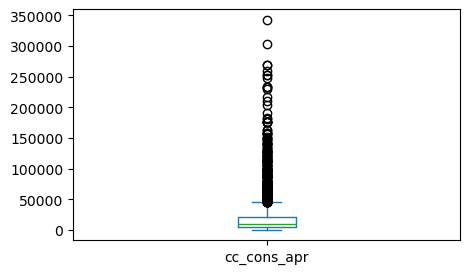

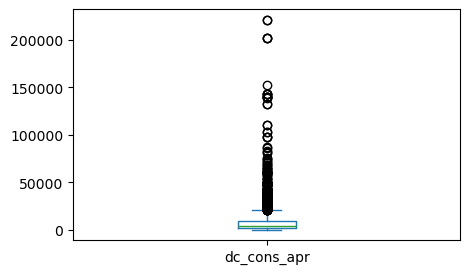

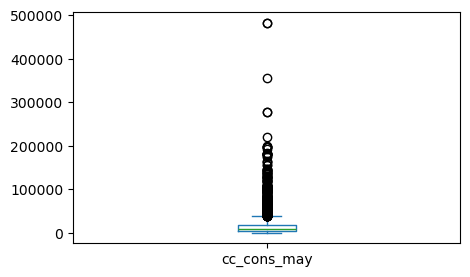

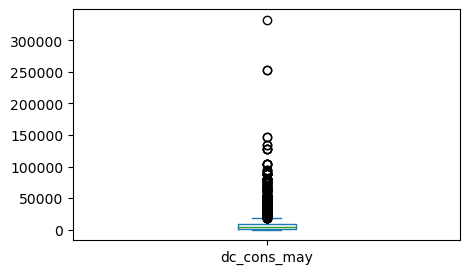

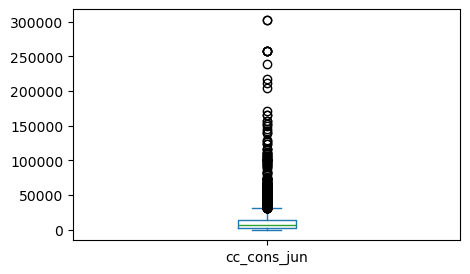

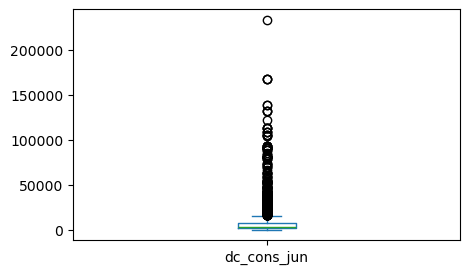

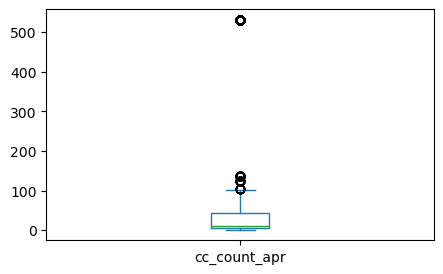

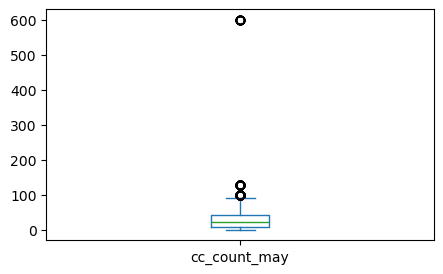

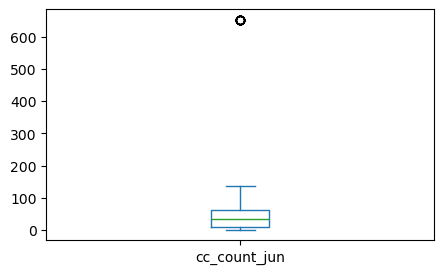

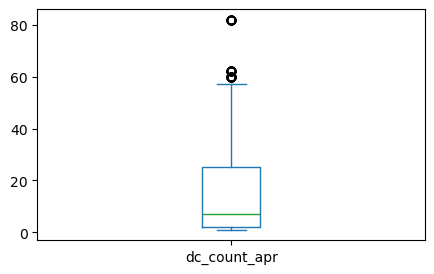

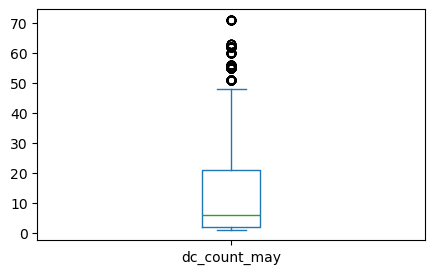

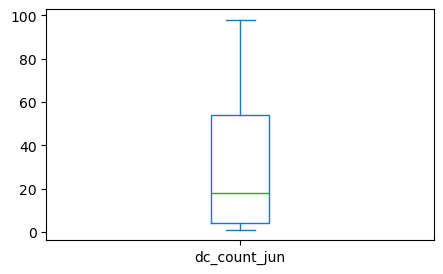

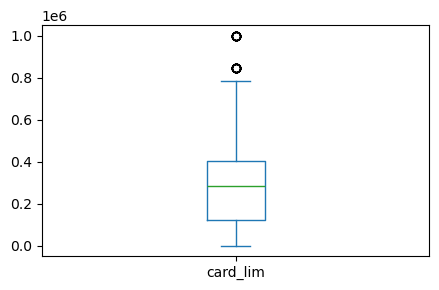

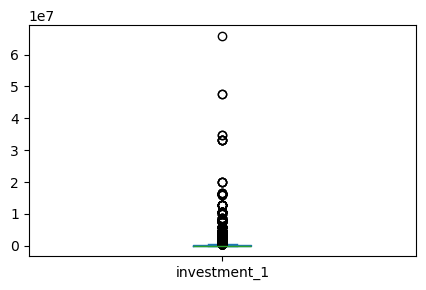

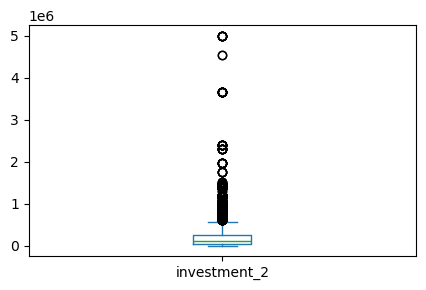

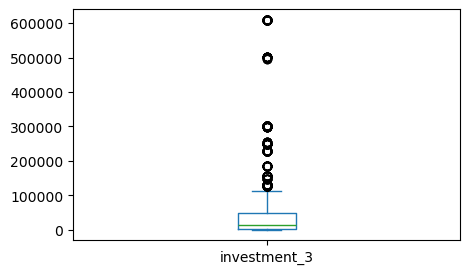

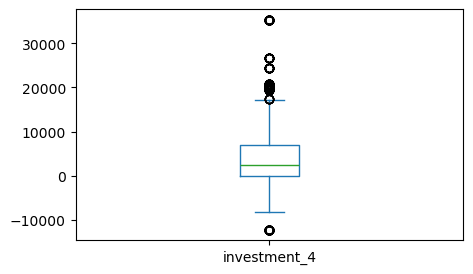

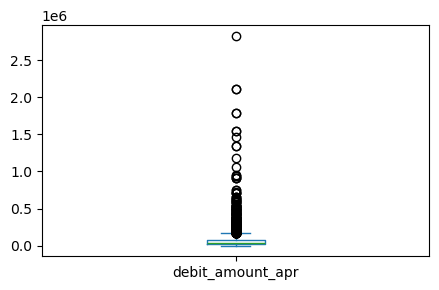

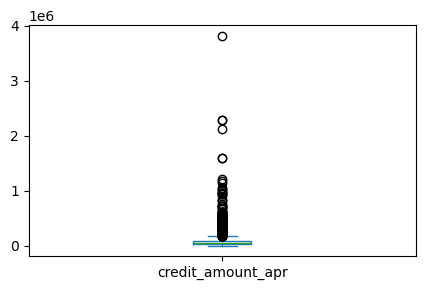

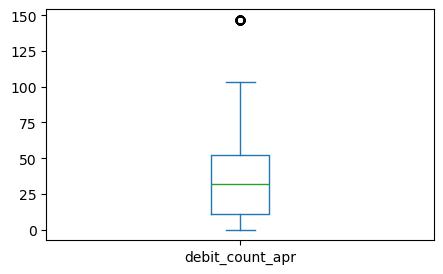

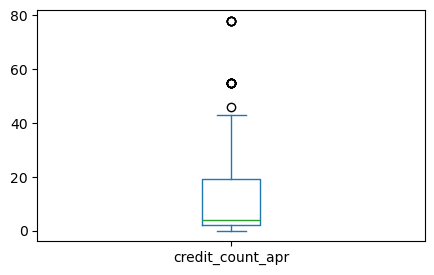

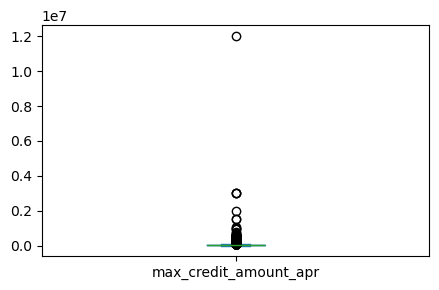

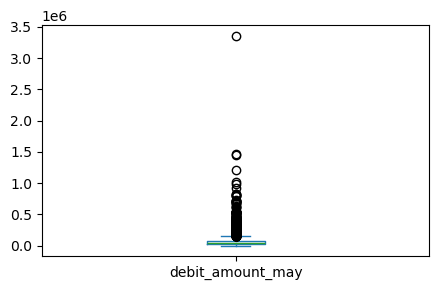

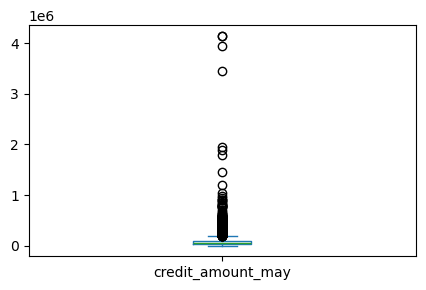

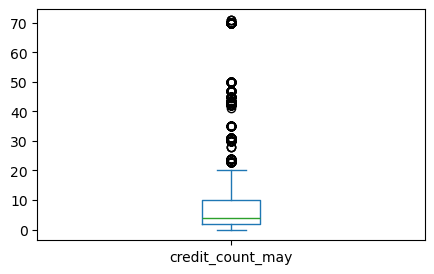

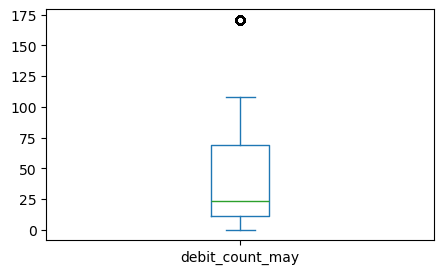

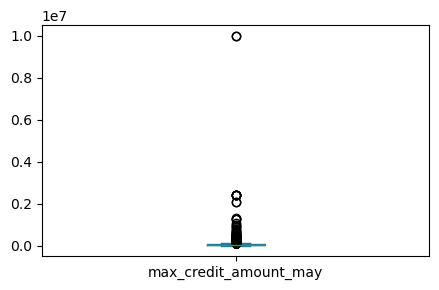

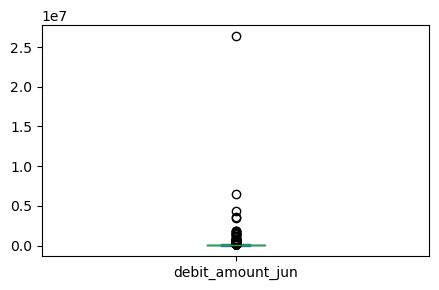

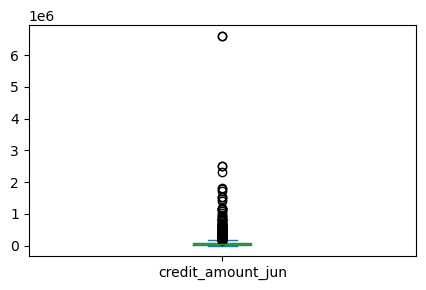

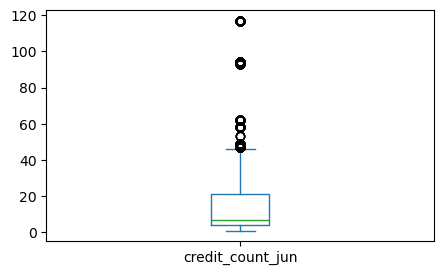

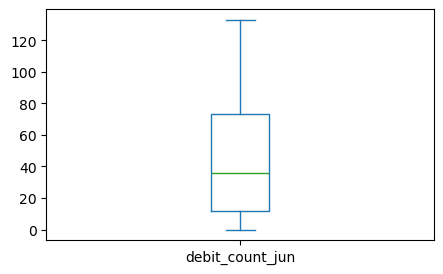

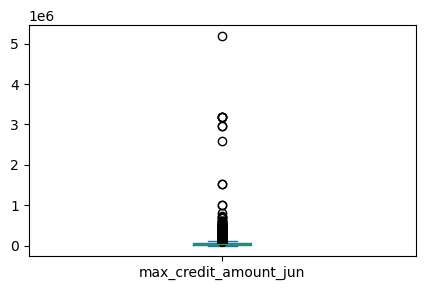

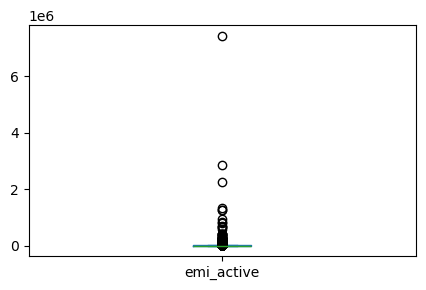

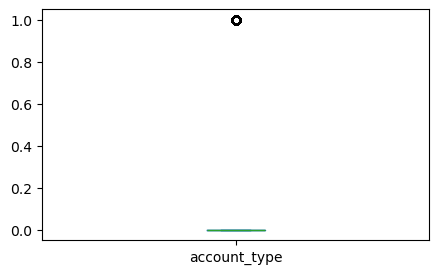

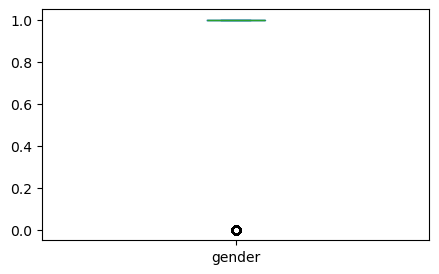

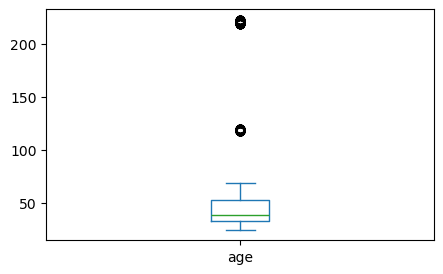

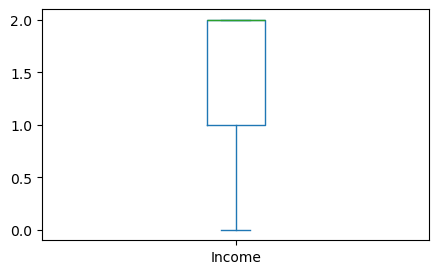

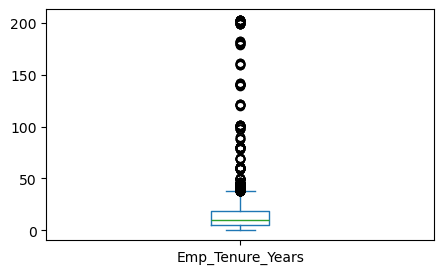

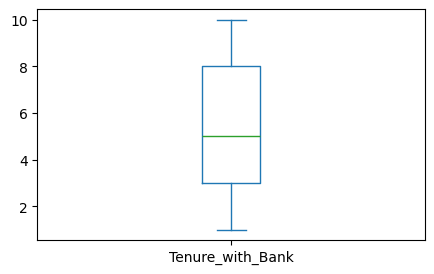

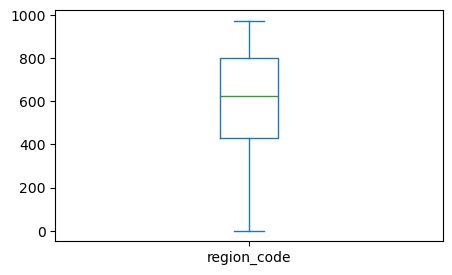

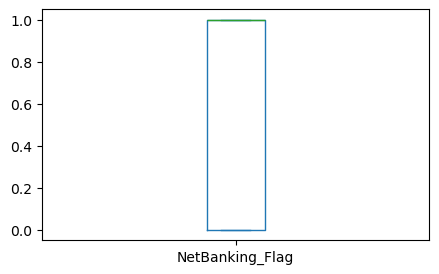

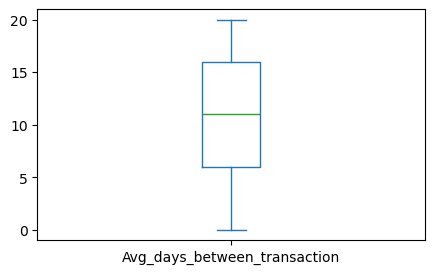

cc_cons_apr                     None
dc_cons_apr                     None
cc_cons_may                     None
dc_cons_may                     None
cc_cons_jun                     None
dc_cons_jun                     None
cc_count_apr                    None
cc_count_may                    None
cc_count_jun                    None
dc_count_apr                    None
dc_count_may                    None
dc_count_jun                    None
card_lim                        None
investment_1                    None
investment_2                    None
investment_3                    None
investment_4                    None
debit_amount_apr                None
credit_amount_apr               None
debit_count_apr                 None
credit_count_apr                None
max_credit_amount_apr           None
debit_amount_may                None
credit_amount_may               None
credit_count_may                None
debit_count_may                 None
max_credit_amount_may           None
d

In [118]:
def plot_box(x):
    plt.figure(figsize=(5,3))
    x.plot(kind='box')
    plt.show()

X_miss.apply(plot_box)

In [119]:
# Handling the outliers

In [120]:
def outliers(col):  #using IQR Rule
    q1 = X_miss[col].quantile(0.25)
    q3 = X_miss[col].quantile(0.75)
    iqr = q3- q1
    ll = q1 - 1.5* iqr
    ul = q3 + 1.5* iqr
    return(ll, ul)

In [121]:
#Treating all the outliers

In [122]:
# Standardize the dataset¶

In [123]:
Miss_pred = SS.fit_transform(X_miss)

In [124]:
Miss_pred = pd.DataFrame(Miss_pred)
Miss_pred.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,-0.588787,-0.481557,-0.387330,-0.497735,-0.153032,0.617412,-0.383519,-0.452795,-0.825844,1.586059,...,-0.103476,-0.43676,0.388945,-0.349472,0.700479,-0.162873,-0.504229,-0.115585,0.633828,0.912989
1,0.472668,-0.456470,-0.567760,-0.371046,-0.061449,-0.458532,-0.393618,-0.452795,-0.825844,1.743478,...,0.016820,-0.43676,0.388945,-0.484960,0.700479,-0.358303,0.189251,-0.936940,-1.577715,1.463623
2,-0.461548,-0.130416,-0.526352,-0.491392,-0.581615,-0.223146,-0.353224,-0.072388,-0.803739,0.379180,...,-0.092044,-0.43676,0.388945,0.192481,-0.856141,0.842876,1.576209,-1.254592,0.633828,0.729444
3,-0.616291,0.732277,0.767738,-0.533848,-0.401426,0.966058,-0.413815,1.240019,0.655201,-0.617806,...,-0.110009,-0.43676,0.388945,-0.484960,0.700479,-0.358303,-0.157489,-1.045849,0.633828,-0.738915
4,-0.569897,-0.320859,-0.507695,-0.354329,-0.446510,-0.150040,-0.403716,-0.452795,0.124677,-0.617806,...,-0.090549,-0.43676,0.388945,0.497330,-0.856141,-0.129507,1.229470,-0.433236,0.633828,-1.473094


In [125]:
Miss_pred.columns = X_miss.columns
Miss_pred.head()

,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,...,emi_active,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,-0.588787,-0.481557,-0.387330,-0.497735,-0.153032,0.617412,-0.383519,-0.452795,-0.825844,1.586059,...,-0.103476,-0.43676,0.388945,-0.349472,0.700479,-0.162873,-0.504229,-0.115585,0.633828,0.912989
1,0.472668,-0.456470,-0.567760,-0.371046,-0.061449,-0.458532,-0.393618,-0.452795,-0.825844,1.743478,...,0.016820,-0.43676,0.388945,-0.484960,0.700479,-0.358303,0.189251,-0.936940,-1.577715,1.463623
2,-0.461548,-0.130416,-0.526352,-0.491392,-0.581615,-0.223146,-0.353224,-0.072388,-0.803739,0.379180,...,-0.092044,-0.43676,0.388945,0.192481,-0.856141,0.842876,1.576209,-1.254592,0.633828,0.729444
3,-0.616291,0.732277,0.767738,-0.533848,-0.401426,0.966058,-0.413815,1.240019,0.655201,-0.617806,...,-0.110009,-0.43676,0.388945,-0.484960,0.700479,-0.358303,-0.157489,-1.045849,0.633828,-0.738915
4,-0.569897,-0.320859,-0.507695,-0.354329,-0.446510,-0.150040,-0.403716,-0.452795,0.124677,-0.617806,...,-0.090549,-0.43676,0.388945,0.497330,-0.856141,-0.129507,1.229470,-0.433236,0.633828,-1.473094


In [126]:
# Model Predictions

In [127]:
pred = model.predict(Miss_pred)

In [128]:
pred

array([12055.93, 38614.85, 15234.22, ..., 12519.42, 22043.55, 35328.64])

In [132]:
miss_data['cc_cons'] = pred
miss_data[['ID', 'cc_cons']].to_csv('Prediced_Credit_Card_Consumption.csv', index=False)

In [133]:
miss_data[['ID', 'cc_cons']]

,ID,cc_cons
15000,17591,12055.93
15001,13541,38614.85
15002,13431,15234.22
15003,8687,11369.68
15004,14727,12528.69
...,...,...
19995,12512,13894.87
19996,14224,14245.20
19997,18740,12519.42
19998,18134,22043.55
